In [48]:
#### DRIVER MUTATIONS PERCENTAGES ANALYISIS IN THE DIFFERENT CATEGORIES OF CLINICAL VARIABLES ##############

# Import necessary libraries
import numpy as np  # Library for numerical computations and arrays
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations and plots
import os  # Library for interacting with the operating system (files, directories)
import seaborn as sns  # Library for statistical data visualization

# Load mutation data obtained with the specific filter applied after variant calling to select driver genes.
df_mutations = pd.read_excel('/home/vant/TFM/High_Filter_Davidaltreads40VAF0.1.xlsx')

# Remove specific samples with artefacts in variant calling and mixed case (RVB3)
df_mutations = df_mutations[~df_mutations['Sample'].isin(['OVE44', 'OVE16','RVB3'])]

# Rename specific samples in df_mutations
df_mutations['Sample'] = df_mutations['Sample'].replace({
    'LP16_old': 'LP16', 
    'LP17_old': 'LP17', 
    'MDA51T1': 'MDA51_T1_CCC', 
    'MDA51T2': 'MDA51_T2_EC'
})

# Load file containing other variables
df_variables = pd.read_excel('/home/vant/TFM/Final_db/Samples_alltypedata_annotated.xlsx')

# Remove the first two rows from df_variables (contain description and coding information)
df_variables = df_variables.iloc[2:].reset_index(drop=True)

########Firstly we change misclassified samples according to the molecular classsifier to redo the analysis  #######################

# Change the values to 'MMRp' for samples 'LP20', 'LP26', and 'MDA15'
# We use .loc[] to access specific rows where 'ID_CNIO' matches one of the specified samples
df_variables.loc[df_variables['ID_CNIO'].isin(['LP20', 'LP26', 'MDA15']), 'MMR_final_status'] = 'MMRp'

# Change the value to 'MMRd' for sample 'MDA26' 
df_variables.loc[df_variables['ID_CNIO'].isin(['MDA26']), 'MMR_final_status'] = 'MMRd'

# Remove samples with artefacts in variant calling and mixed case (RVB3)
df_variables = df_variables[~df_variables['ID_CNIO'].isin(['OVE44', 'OVE16','RVB3'])]

# Select necessary columns and make an independent copy
columns_of_interest = ['ID_CNIO','HISTOLOGY','MMR_final_status','FIGOa','GRADE','RESIDUALa']
df_variables_filtered = df_variables[columns_of_interest].copy()

# Clean values for merging in the independent copy
df_variables_filtered['ID_CNIO'] = df_variables_filtered['ID_CNIO'].str.strip().str.upper()

# Clean values in df_mutations
df_mutations['Sample'] = df_mutations['Sample'].str.strip().str.upper()

# Merge DataFrames based on common columns. I keep only samples in both dataframes
df_combined = pd.merge(df_mutations, df_variables_filtered, left_on='Sample', right_on='ID_CNIO', how='inner')

# Print the length of the combined DataFrame
print("Length of df_combined is:", len(df_combined))

# Save a subset of the combined data to an Excel file
mutations_subset = df_combined[['Sample', 'Gene','Function', 'Abbreviation', 'Ref', 'Alt', 'HISTOLOGY','MMR_final_status','FIGOa','GRADE','RESIDUALa']]

Length of df_combined is: 583


In [49]:
# Calculate the total number of samples in the entire cohort (including those without mutations)
total_samples = len(df_variables_filtered['ID_CNIO'].unique()) 
print("Total number of samples (including those without mutations):", total_samples)

# Calculate the total number of samples in the entire cohort with mutations in the mutations file
total_samples_onlymut = len(df_mutations['Sample'].unique())
print("Total number of samples with mutations:", total_samples_onlymut)

# Calculate the total number of samples in the entire cohort with mutations and variables data
total_samples_mut = len(mutations_subset['Sample'].unique())
print("Total number of samples with mutations and variables data:", total_samples_mut)

# Keep unique combinations Sample-Gene
unique_mutations_per_sample = mutations_subset.drop_duplicates(subset=['Sample', 'Gene'])
print(unique_mutations_per_sample.head())
unique_mutations_per_sample.to_excel("Unique combinations sample-gene.xlsx",index=False)

# Calculate the number of samples mutated per gene
mut_samples_per_gene = unique_mutations_per_sample['Gene'].value_counts()
print("Number of samples mutated per gene:\n", mut_samples_per_gene)

# Calculate the percentage of samples in which each gene is mutated (the total includes samples with and without mutations) 
mutation_percentage = (mut_samples_per_gene / total_samples) * 100
print("Percentage of mutated samples per gene:\n",mutation_percentage)

# Get the dataframe with the top 20 genes most mutated genes and their percentages
top_20_genes = mutation_percentage.head(20)
print("Top 20 genes:\n", top_20_genes)
# Create a DataFrame with the percentage results for the top 20 genes
top_20_results_df = pd.DataFrame({
    'Gene': top_20_genes.index,
    'Mutation Percentage': top_20_genes.values
})

# Create a list of genes ordered by mutation percentage 
genes_sorted_by_percentage = top_20_genes.index.tolist()

# Display the sorted list of genes by mutation percentage
print("Genes sorted by mutation percentage in the entire cohort:", genes_sorted_by_percentage)

Total number of samples (including those without mutations): 166
Total number of samples with mutations: 160
Total number of samples with mutations and variables data: 153
  Sample    Gene             Function Abbreviation Ref Alt HISTOLOGY  \
0    LP1  ARID1A             stopgain       Q1346X   C   T         0   
1    LP1  CTNNB1             missense         S33C   C   G         0   
2    LP1    PTEN             stopgain         Q17X   C   T         0   
3   LP13  ARID1A             stopgain       L2147X   T   A         0   
4   LP13  PIK3R1  frameshift_deletion   K513Nfs*19  TA   T         0   

  MMR_final_status FIGOa GRADE RESIDUALa  
0             MMRp     1     2         0  
1             MMRp     1     2         0  
2             MMRp     1     2         0  
3             MMRp     4     2         0  
4             MMRp     4     2         0  
Number of samples mutated per gene:
 Gene
ARID1A    79
PIK3CA    70
CTNNB1    38
KRAS      35
PTEN      34
          ..
BMPR2      1
STK1

In [50]:
# Obtain the most frequently mutated genes (Top 20 genes)
top_genes = mutation_percentage.head(20).index
print("Top genes:\n",top_genes)
# Extract mutations dataframe for top 20 genes
top_mutations = mutations_subset[mutations_subset['Gene'].isin(top_genes)]
print("Top mutations:\n",top_mutations)
# Calculate the number of samples with mutations in the top 20 most frequently mutated genes
total_samples_top_mut = len(top_mutations['Sample'].unique())
print("Number of samples with mutations in top 20 most mutated genes:",total_samples_top_mut)

Top genes:
 Index(['ARID1A', 'PIK3CA', 'CTNNB1', 'KRAS', 'PTEN', 'TP53', 'PPP2R1A',
       'FBXW7', 'PIK3R1', 'ATM', 'KMT2C', 'MSH6', 'ARID1B', 'ERBB2', 'NF1',
       'BRCA2', 'MLH1', 'CSMD3', 'MSH2', 'BRCA1'],
      dtype='object', name='Gene')
Top mutations:
     Sample    Gene             Function Abbreviation    Ref Alt HISTOLOGY  \
0      LP1  ARID1A             stopgain       Q1346X      C   T         0   
1      LP1  CTNNB1             missense         S33C      C   G         0   
2      LP1    PTEN             stopgain         Q17X      C   T         0   
3     LP13  ARID1A             stopgain       L2147X      T   A         0   
4     LP13  PIK3R1  frameshift_deletion   K513Nfs*19     TA   T         0   
..     ...     ...                  ...          ...    ...  ..       ...   
575   RVB5    PTEN  frameshift_deletion    K267Rfs*9     TA   T         1   
576   RVB5    PTEN             stopgain        T319*  GTACT   G         1   
578   RVB5   BRCA1  frameshift_deletion   K65

In [51]:
# Remove duplicate rows based on 'Sample', 'Gene', 'MMR_final_status', and 'HISTOLOGY' columns. 'MMR_final_status' and 'HISTOLOGY' values
# are always the same for the same sample. Here we add these columns because we need this information later.
mutations_subset_unique = mutations_subset[['Sample', 'Gene', 'MMR_final_status', 'HISTOLOGY']].drop_duplicates()
print(mutations_subset_unique.head())

  Sample    Gene MMR_final_status HISTOLOGY
0    LP1  ARID1A             MMRp         0
1    LP1  CTNNB1             MMRp         0
2    LP1    PTEN             MMRp         0
3   LP13  ARID1A             MMRp         0
4   LP13  PIK3R1             MMRp         0


In [52]:
### CALCULATE PERCENTAGES OF SAMPLES MUTATED IN TOP 20 GENES FOR FIGOa VARIABLE IN EVERY HISTOLOGY (MMRp + MMRd) ########
### FIGOa values can be: 1,2,3 or 4. 1 and 2 define localized-stage tumors and 3 and 4 define advanced-stage tumors.

# Filter samples where 'FIGOa' is not empty. 
df_var1 = df_variables.dropna(subset=['FIGOa']).copy()

# Define subgroups for EOC and CCOC with MMRp and MMRd samples
### EOC (HISTOLOGY=0) and FIGOa= 1 or 2
eoc_figo12 = df_var1[
    (df_var1['HISTOLOGY'] == 0) & 
    (df_var1['FIGOa'].isin([1, 2]))
]
total_eoc_figo12 = len(eoc_figo12['ID_CNIO'].unique())
print("Total number of EOC samples (FIGO 1 and 2):", total_eoc_figo12)

### EOC (HISTOLOGY=0) and FIGOa= 3 or 4
eoc_figo34 = df_var1[ 
    (df_var1['HISTOLOGY'] == 0) & 
    (df_var1['FIGOa'].isin([3, 4]))
]
total_eoc_figo34 = len(eoc_figo34['ID_CNIO'].unique())
print("Total number of EOC samples (FIGO 3 and 4):", total_eoc_figo34)

## CC (HISTOLOGY=1) and FIGOa= 1 or 2
cc_figo12 = df_var1[
    (df_var1['HISTOLOGY'] == 1) & 
    (df_var1['FIGOa'].isin([1, 2]))
]
total_cc_figo12 = len(cc_figo12['ID_CNIO'].unique())
print("Total number of CC samples (FIGO 1 and 2):", total_cc_figo12)

## CC (HISTOLOGY=1) and FIGOa= 3 or 4
cc_figo34 = df_var1[
    (df_var1['HISTOLOGY'] == 1) & 
    (df_var1['FIGOa'].isin([3, 4]))
]
total_cc_figo34 = len(cc_figo34['ID_CNIO'].unique())
print("Total number of CC samples (FIGO 3 and 4):", total_cc_figo34)

### Prepare mutations data for every subgroup based on FIGOa groups
eoc_figo12_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_figo12['ID_CNIO']))
]
eoc_figo34_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_figo34['ID_CNIO']))
]
cc_figo12_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['Sample'].isin(cc_figo12['ID_CNIO']))
]
cc_figo34_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['Sample'].isin(cc_figo34['ID_CNIO']))
]

# Function to calculate the percentage per gene
def calculate_gene_percentage(data, total_samples):
    gene_counts = data['Gene'].value_counts()
    return (gene_counts / total_samples) * 100

# Calculate the mutation percentage in every subgroup based on FIGOa groups
eoc_figo12_percentages = calculate_gene_percentage(eoc_figo12_mut, total_eoc_figo12)
eoc_figo34_percentages = calculate_gene_percentage(eoc_figo34_mut, total_eoc_figo34)

cc_figo12_percentages = calculate_gene_percentage(cc_figo12_mut, total_cc_figo12)
cc_figo34_percentages = calculate_gene_percentage(cc_figo34_mut, total_cc_figo34)


# Create dataframes with genes and percentages for each subgroup
eoc_figo12_df = pd.DataFrame({'Gene': eoc_figo12_percentages.index, 'Percentage': eoc_figo12_percentages.values})
eoc_figo34_df = pd.DataFrame({'Gene': eoc_figo34_percentages.index, 'Percentage': eoc_figo34_percentages.values})

cc_figo12_df = pd.DataFrame({'Gene': cc_figo12_percentages.index, 'Percentage': cc_figo12_percentages.values})
cc_figo34_df = pd.DataFrame({'Gene': cc_figo34_percentages.index, 'Percentage': cc_figo34_percentages.values})

# Reorder the DataFrames according to the most mutated genes in all cohort (EOC+CC)
eoc_figo12_df = eoc_figo12_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_figo34_df = eoc_figo34_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

cc_figo12_df = cc_figo12_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_figo34_df = cc_figo34_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

# Print final DataFrames for verification
print("EOC FIGO 1 and 2:\n", eoc_figo12_df)
print("EOC FIGO 3 and 4:\n", eoc_figo34_df)

print("CC FIGO 1 and 2:\n", cc_figo12_df)
print("CC FIGO 3 and 4:\n", cc_figo34_df)

Total number of EOC samples (FIGO 1 and 2): 74
Total number of EOC samples (FIGO 3 and 4): 14
Total number of CC samples (FIGO 1 and 2): 43
Total number of CC samples (FIGO 3 and 4): 30
EOC FIGO 1 and 2:
        Gene  Percentage
0    ARID1A   43.243243
1    PIK3CA   36.486486
2    CTNNB1   36.486486
3      KRAS   28.378378
4      PTEN   31.081081
5      TP53   12.162162
6   PPP2R1A    2.702703
7     FBXW7    9.459459
8    PIK3R1    5.405405
9       ATM    6.756757
10    KMT2C    1.351351
11     MSH6    6.756757
12   ARID1B    2.702703
13    ERBB2    5.405405
14      NF1    5.405405
15    BRCA2    5.405405
16     MLH1    5.405405
17    CSMD3    4.054054
18     MSH2    2.702703
19    BRCA1    1.351351
EOC FIGO 3 and 4:
        Gene  Percentage
0    ARID1A   57.142857
1    PIK3CA   42.857143
2    CTNNB1   42.857143
3      KRAS   35.714286
4      PTEN   21.428571
5      TP53   14.285714
6   PPP2R1A   14.285714
7     FBXW7    0.000000
8    PIK3R1   14.285714
9       ATM    0.000000
10    KM

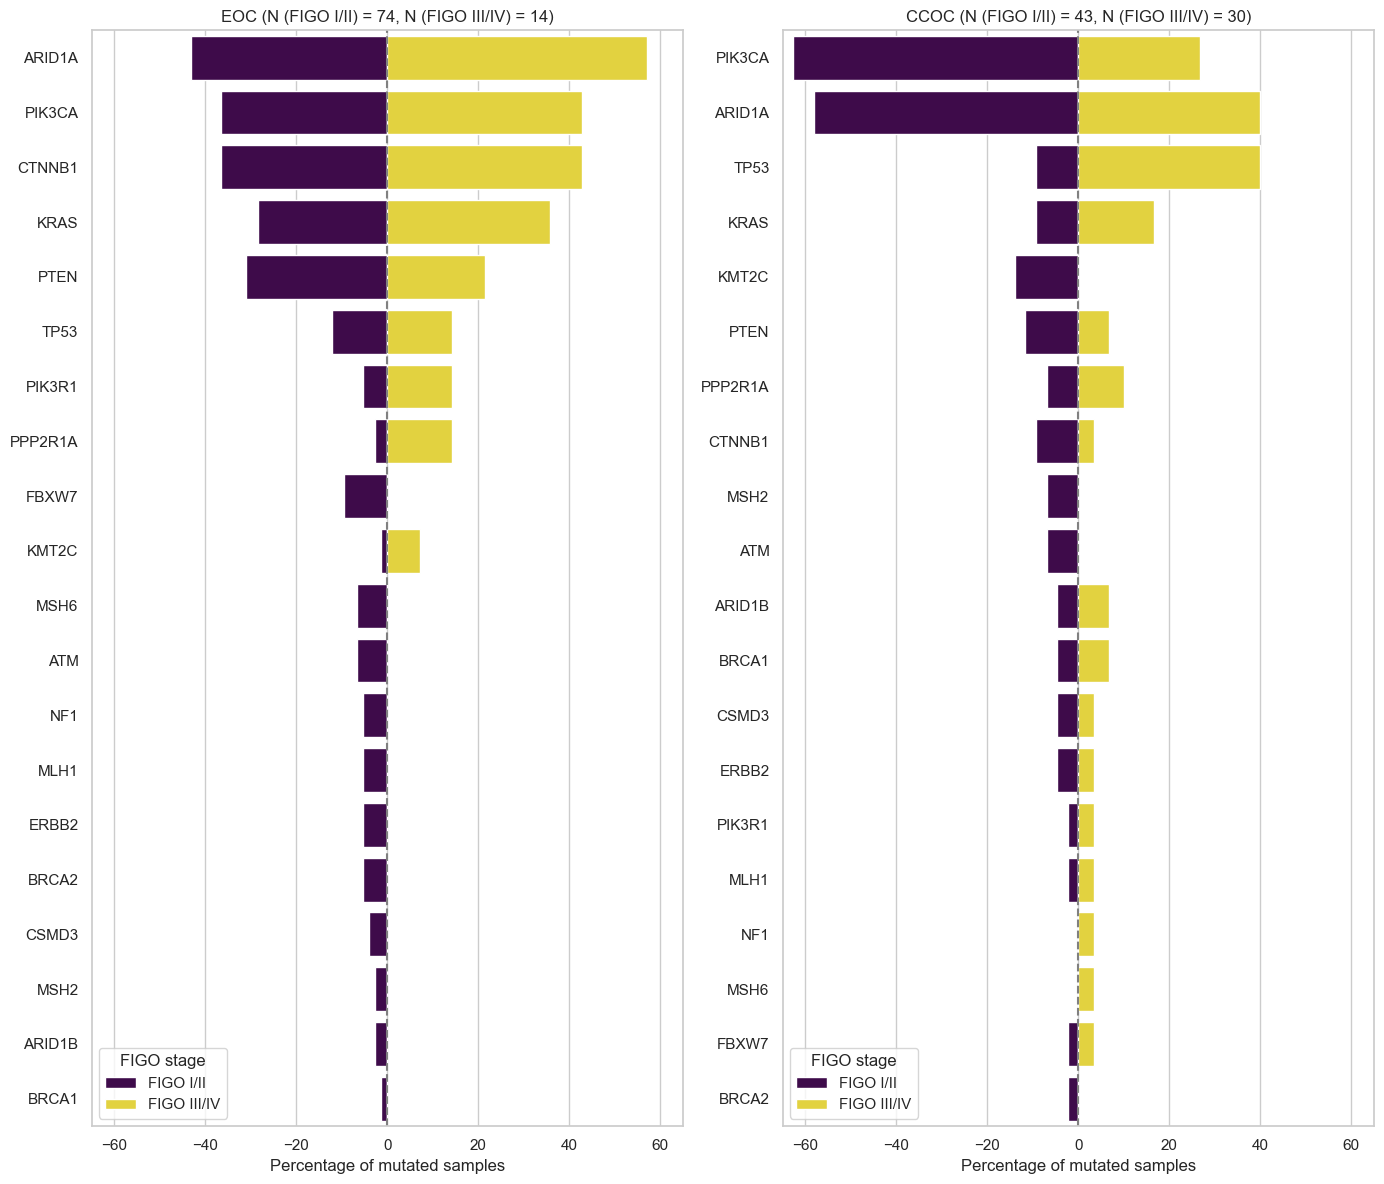

In [53]:
### BAR PLOTS SHOWING THE PERCENTAGES OF SAMPLES WITH MUTATONS IN TOP 20 GENES IN THE ENTIRE COHORT IN EVERY GROUPED FIGOa CATEGORY ########

# Set the style for the plots
sns.set(style="whitegrid")

# Function to create combined horizontal bar plots for EOC and CCOC with N included in the title
def plot_combined_horizontal_bar(data_figo12, data_figo34, N_figo12, N_figo34, title, ax, x_limit):
    # Create copies of the DataFrames 
    data_figo12 = data_figo12.copy()
    data_figo34 = data_figo34.copy()
    
    # Add Group column to each dataset
    data_figo12['Group'] = 'FIGO I/II'
    data_figo34['Group'] = 'FIGO III/IV'
    
    # Concatenate DataFrames
    combined_data = pd.concat([data_figo12, data_figo34])

    # Adjust values for FIGO 1 & 2 to be negative
    combined_data['Adjusted Percentage'] = combined_data.apply(
        lambda x: -x['Percentage'] if x['Group'] == 'FIGO I/II' else x['Percentage'], axis=1
    )
    # Ordered genes by %
    combined_data['Gene'] = pd.Categorical(
        combined_data['Gene'], 
        categories=combined_data.sort_values(by='Percentage', ascending=False)['Gene'].unique()
    )
    # Create horizontal bar plot
    sns.barplot(x='Adjusted Percentage', y='Gene', data=combined_data, ax=ax, hue='Group', dodge=False, palette=['#440154', '#fde725'])

    # Set title with N values
    ax.set_title(f"{title} (N (FIGO I/II) = {N_figo12}, N (FIGO III/IV) = {N_figo34})")
    ax.set_xlabel('Percentage of mutated samples')
    ax.axvline(x=0, color='gray', linestyle='--')
    ax.set_ylabel('')  # Clear y-axis label
    ax.set_xlim(-x_limit, x_limit)

# Create a figure with subplots for both EOC and CCOC
fig, axs = plt.subplots(1, 2, figsize=(14, 12))  # Adjust figure size as needed

# Plot for each subgroup with appropriate axis limits
plot_combined_horizontal_bar(eoc_figo12_df, eoc_figo34_df, total_eoc_figo12, total_eoc_figo34, 'EOC', ax=axs[0], x_limit=65)
plot_combined_horizontal_bar(cc_figo12_df, cc_figo34_df, total_cc_figo12, total_cc_figo34, 'CCOC', ax=axs[1], x_limit=65)

# Add legends to each subplot
for ax in axs.flatten():
    legend = ax.legend(title='FIGO stage', loc='best', frameon=True)

# Adjust layout to prevent overlap
plt.tight_layout()
# Save plot
plt.savefig("/home/vant/TFM/Plots_TFM_final/Drivers_percentages_FIGO_ALL.png", format='png')
plt.show()

In [54]:
# Check structure of mutations_subset_unique dataframe
print(mutations_subset_unique)

    Sample    Gene MMR_final_status HISTOLOGY
0      LP1  ARID1A             MMRp         0
1      LP1  CTNNB1             MMRp         0
2      LP1    PTEN             MMRp         0
3     LP13  ARID1A             MMRp         0
4     LP13  PIK3R1             MMRp         0
..     ...     ...              ...       ...
578   RVB5   BRCA1             MMRd         1
579   RVB5   LMAN1             MMRd         1
580   RVB6  ARID1A             MMRd         0
581   RVB6   ARID2             MMRd         0
582   RVB6   ERBB2             MMRd         0

[516 rows x 4 columns]


In [55]:
### CHECK SIGNIFICANCE DIFFERENCES IN FREQUENCY OF MUTATED GENES IN THE COMPLETE EOC SERIES ###########
#### FISHER'S EXACT TEST (LIMITED SAMPLE SIZE AT LEAST IN ONE OF THE GROUPS) #####
# We import the test
from scipy.stats import fisher_exact

# Total number of samples in each group 
print(total_eoc_figo12)
print(total_eoc_figo34)

# Dictionary with gene mutation percentages for FIGO12 , FIGO34 groups (I choose genes most differently mutated according to the plot)
gene_data = {
    'ARID1A': (43.24, 57.14),
    'PIK3CA': (36.49, 42.86),
    'CTNNB1': (36.49, 42.86),
    'KRAS': (28.38, 35.71),
    'PTEN': (31.08, 21.43),
    'TP53': (12.16, 14.29),
    'PIK3R1': (5.41, 14.29),
    'PPP2R1A': (2.7, 14.29),
    'KMT2C': (1.35, 7.14)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (eoc_figo12_percentages, eoc_figo34_percentages) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_figo12 = int(round( eoc_figo12_percentages / 100 * total_eoc_figo12))
    not_mutated_figo12 = total_eoc_figo12- mutated_figo12
    mutated_figo34 = int(round( eoc_figo34_percentages / 100 * total_eoc_figo34))
    not_mutated_figo34 = total_eoc_figo34 - mutated_figo34

    # Create the contingency table
    table = [[mutated_figo12, not_mutated_figo12], [mutated_figo34, not_mutated_figo34]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the FIGO groups.")
    else:
        print("There is no significant difference in mutation proportions between the FIGO groups.")
    print("----------")

74
14
Gene: ARID1A
Odds ratio: 0.5714285714285714
p-value: 0.3898195478385985
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: PIK3CA
Odds ratio: 0.7659574468085106
p-value: 0.7653788587982676
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: CTNNB1
Odds ratio: 0.7659574468085106
p-value: 0.7653788587982676
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: KRAS
Odds ratio: 0.7132075471698113
p-value: 0.7500911245253401
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: PTEN
Odds ratio: 1.65359477124183
p-value: 0.5426196052633582
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: TP53
Odds ratio: 0.8307692307692308
p-value: 1.0
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: PIK3R1
Od

In [56]:
### CHECK SIGNIFICANCE DIFFERENCES IN FREQUENCY OF MUTATED GENES IN THE COMPLETE CCOC SERIES BETWEEN FIGO CATEGORIES ###########
#### FISHER'S EXACT TEST (LIMITED SAMPLE SIZE AT LEAST IN ONE OF THE GROUPS) #####

# Uncomment to import if not done previously
# from scipy.stats import fisher_exact

# Total number of samples in each group
print(total_cc_figo12)
print(total_cc_figo34)

# Dictionary with gene mutation percentages for FIGO12 , FIGO34 groups (I choose genes most differently mutated according to the plot)
gene_data = {
    'ARID1A': (58.14, 40),
    'PIK3CA': (62.79, 26.67),
    'CTNNB1': (9.3, 3.33),
    'KRAS': (9.3, 16.67),
    'PTEN': (11.63, 6.67),
    'TP53': (9.3, 40),
    'PPP2R1A': (6.98, 10)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (cc_figo12_percentages, cc_figo34_percentages) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_figo12 = int(round( cc_figo12_percentages / 100 * total_cc_figo12))
    not_mutated_figo12 = total_cc_figo12- mutated_figo12
    mutated_figo34 = int(round( cc_figo34_percentages / 100 * total_cc_figo34))
    not_mutated_figo34 = total_cc_figo34 - mutated_figo34

    # Create the contingency table
    table = [[mutated_figo12, not_mutated_figo12], [mutated_figo34, not_mutated_figo34]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the FIGO groups.")
    else:
        print("There is no significant difference in mutation proportions between the FIGO groups.")
    print("----------")


43
30
Gene: ARID1A
Odds ratio: 2.0833333333333335
p-value: 0.1569832946200893
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: PIK3CA
Odds ratio: 4.640625
p-value: 0.003969426491367379
There is a significant difference in mutation proportions between the FIGO groups.
----------
Gene: CTNNB1
Odds ratio: 2.9743589743589745
p-value: 0.64259549754353
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: KRAS
Odds ratio: 0.5128205128205128
p-value: 0.473315443390989
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: PTEN
Odds ratio: 1.8421052631578947
p-value: 0.6924877854193672
There is no significant difference in mutation proportions between the FIGO groups.
----------
Gene: TP53
Odds ratio: 0.15384615384615385
p-value: 0.0032439606973400812
There is a significant difference in mutation proportions between the FIGO groups.
----------
Gene: P

In [57]:
#### CALCULATE PERCENTAGE OF SAMPLES MUTATED IN TOP 20 MOST MUTATED GENES (IN THE ENTIRE COHORT) IN EVERY HISTOTYPE AND MMR STATUS ########

# Filter samples where 'FIGOa' is not empty. 
df_var2 = df_variables.dropna(subset=['FIGOa']).copy()

# Define subgroups for EOC and CCOC 
### EOC, MMRp, FIGO 1 or 2
eoc_mmrp_figo12 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRp') & 
    (df_var2['HISTOLOGY'] == 0) & 
    (df_var2['FIGOa'].isin([1, 2]))
]
total_eoc_mmrp_figo12 = len(eoc_mmrp_figo12['ID_CNIO'].unique())
print("Total number of MMRp EOC samples (FIGO 1 and 2):", total_eoc_mmrp_figo12)

### EOC, MMRd, FIGO 1 or 2
eoc_mmrd_figo12 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRd') & 
    (df_var2['HISTOLOGY'] == 0) & 
    (df_var2['FIGOa'].isin([1, 2]))
]
total_eoc_mmrd_figo12 = len(eoc_mmrd_figo12['ID_CNIO'].unique())
print("Total number of MMRd EOC samples (FIGO 1 and 2):", total_eoc_mmrd_figo12)

### EOC,MMRp, FIGO 3 or 4
eoc_mmrp_figo34 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRp') & 
    (df_var2['HISTOLOGY'] == 0) & 
    (df_var2['FIGOa'].isin([3, 4]))
]
total_eoc_mmrp_figo34 = len(eoc_mmrp_figo34['ID_CNIO'].unique())
print("Total number of MMRp EOC samples (FIGO 3 and 4):", total_eoc_mmrp_figo34)

### EOC,MMRd, FIGO 3 or 4
eoc_mmrd_figo34 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRd') & 
    (df_var2['HISTOLOGY'] == 0) & 
    (df_var2['FIGOa'].isin([3, 4]))
]
total_eoc_mmrd_figo34 = len(eoc_mmrd_figo34['ID_CNIO'].unique())
print("Total number of MMRd EOC samples (FIGO 3 and 4):", total_eoc_mmrd_figo34)

## CC,MMRp, FIGO 1 or 2
cc_mmrp_figo12 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRp') & 
    (df_var2['HISTOLOGY'] == 1) & 
    (df_var2['FIGOa'].isin([1, 2]))
]
total_cc_mmrp_figo12 = len(cc_mmrp_figo12['ID_CNIO'].unique())
print("Total number of MMRp CC samples (FIGO 1 and 2):", total_cc_mmrp_figo12)

## CC,MMRd, FIGO 1 or 2
cc_mmrd_figo12 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRd') & 
    (df_var2['HISTOLOGY'] == 1) & 
    (df_var2['FIGOa'].isin([1, 2]))
]
total_cc_mmrd_figo12 = len(cc_mmrd_figo12['ID_CNIO'].unique())
print("Total number of MMRd CC samples (FIGO 1 and 2):", total_cc_mmrd_figo12)

## CC,MMRp, FIGO 3 or 4
cc_mmrp_figo34 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRp') & 
    (df_var2['HISTOLOGY'] == 1) & 
    (df_var2['FIGOa'].isin([3, 4]))
]
total_cc_mmrp_figo34 = len(cc_mmrp_figo34['ID_CNIO'].unique())
print("Total number of MMRp CC samples (FIGO 3 and 4):", total_cc_mmrp_figo34)

## CC,MMRd,FIGO 3 or 4
cc_mmrd_figo34 = df_var2[
    (df_var2['MMR_final_status'] == 'MMRd') & 
    (df_var2['HISTOLOGY'] == 1) & 
    (df_var2['FIGOa'].isin([3, 4]))
]
total_cc_mmrd_figo34 = len(cc_mmrd_figo34['ID_CNIO'].unique())
print("Total number of MMRd CC samples (FIGO 3 and 4):", total_cc_mmrd_figo34)

### Prepare mutations data for every subgroup based on FIGO groups
eoc_mmrp_figo12_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrp_figo12['ID_CNIO']))
]
eoc_mmrd_figo12_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRd') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrd_figo12['ID_CNIO']))
]
eoc_mmrp_figo34_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrp_figo34['ID_CNIO']))
]
eoc_mmrd_figo34_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRd') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrd_figo34['ID_CNIO']))
]

cc_mmrp_figo12_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(cc_mmrp_figo12['ID_CNIO']))
]
cc_mmrd_figo12_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRd') &
    (mutations_subset_unique['Sample'].isin(cc_mmrd_figo12['ID_CNIO']))
]
cc_mmrp_figo34_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(cc_mmrp_figo34['ID_CNIO']))
]
cc_mmrd_figo34_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRd') &
    (mutations_subset_unique['Sample'].isin(cc_mmrd_figo34['ID_CNIO']))
]

# Function to calculate the percentage per gene
def calculate_gene_percentage(data, total_samples):
    gene_counts = data['Gene'].value_counts()
    return (gene_counts / total_samples) * 100

# Calculate the mutation percentage in every subgroup based on FIGO groups
eoc_mmrp_figo12_percentages = calculate_gene_percentage(eoc_mmrp_figo12_mut, total_eoc_mmrp_figo12)
eoc_mmrd_figo12_percentages = calculate_gene_percentage(eoc_mmrd_figo12_mut, total_eoc_mmrd_figo12)
eoc_mmrp_figo34_percentages = calculate_gene_percentage(eoc_mmrp_figo34_mut, total_eoc_mmrp_figo34)
eoc_mmrd_figo34_percentages = calculate_gene_percentage(eoc_mmrd_figo34_mut, total_eoc_mmrd_figo34)

cc_mmrp_figo12_percentages = calculate_gene_percentage(cc_mmrp_figo12_mut, total_cc_mmrp_figo12)
cc_mmrd_figo12_percentages = calculate_gene_percentage(cc_mmrd_figo12_mut, total_cc_mmrd_figo12)
cc_mmrp_figo34_percentages = calculate_gene_percentage(cc_mmrp_figo34_mut, total_cc_mmrp_figo34)
cc_mmrd_figo34_percentages = calculate_gene_percentage(cc_mmrd_figo34_mut, total_cc_mmrd_figo34)

# Create dataframes with genes and percentages for each subgroup
eoc_mmrp_figo12_df = pd.DataFrame({'Gene': eoc_mmrp_figo12_percentages.index, 'Percentage': eoc_mmrp_figo12_percentages.values})
eoc_mmrd_figo12_df = pd.DataFrame({'Gene': eoc_mmrd_figo12_percentages.index, 'Percentage': eoc_mmrd_figo12_percentages.values})
eoc_mmrp_figo34_df = pd.DataFrame({'Gene': eoc_mmrp_figo34_percentages.index, 'Percentage': eoc_mmrp_figo34_percentages.values})
eoc_mmrd_figo34_df = pd.DataFrame({'Gene': eoc_mmrd_figo34_percentages.index, 'Percentage': eoc_mmrd_figo34_percentages.values})

cc_mmrp_figo12_df = pd.DataFrame({'Gene': cc_mmrp_figo12_percentages.index, 'Percentage': cc_mmrp_figo12_percentages.values})
cc_mmrd_figo12_df = pd.DataFrame({'Gene': cc_mmrd_figo12_percentages.index, 'Percentage': cc_mmrd_figo12_percentages.values})
cc_mmrp_figo34_df = pd.DataFrame({'Gene': cc_mmrp_figo34_percentages.index, 'Percentage': cc_mmrp_figo34_percentages.values})
cc_mmrd_figo34_df = pd.DataFrame({'Gene': cc_mmrd_figo34_percentages.index, 'Percentage': cc_mmrd_figo34_percentages.values})

# Reorder the DataFrames according to the most mutated genes in the subgroup.
eoc_mmrp_figo12_df = eoc_mmrp_figo12_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrd_figo12_df = eoc_mmrd_figo12_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrp_figo34_df = eoc_mmrp_figo34_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrd_figo34_df = eoc_mmrd_figo34_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

cc_mmrp_figo12_df = cc_mmrp_figo12_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_mmrd_figo12_df = cc_mmrd_figo12_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_mmrp_figo34_df = cc_mmrp_figo34_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_mmrd_figo34_df = cc_mmrd_figo34_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

# Print final DataFrames for verification
print("EOC MMRp FIGO 1 and 2:", eoc_mmrp_figo12_df)
print("EOC MMRd FIGO 1 and 2:", eoc_mmrd_figo12_df)
print("EOC MMRp FIGO 3 and 4:", eoc_mmrp_figo34_df)
print("EOC MMRd FIGO 3 and 4:", eoc_mmrd_figo34_df)

print("CC MMRp FIGO 1 and 2:", cc_mmrp_figo12_df)
print("CC MMRd FIGO 1 and 2:", cc_mmrd_figo12_df)
print("CC MMRp FIGO 3 and 4:", cc_mmrp_figo34_df)
print("CC MMRd FIGO 3 and 4:", cc_mmrd_figo34_df)

Total number of MMRp EOC samples (FIGO 1 and 2): 63
Total number of MMRd EOC samples (FIGO 1 and 2): 11
Total number of MMRp EOC samples (FIGO 3 and 4): 13
Total number of MMRd EOC samples (FIGO 3 and 4): 1
Total number of MMRp CC samples (FIGO 1 and 2): 40
Total number of MMRd CC samples (FIGO 1 and 2): 3
Total number of MMRp CC samples (FIGO 3 and 4): 28
Total number of MMRd CC samples (FIGO 3 and 4): 2
EOC MMRp FIGO 1 and 2:        Gene  Percentage
0    ARID1A   36.507937
1    PIK3CA   38.095238
2    CTNNB1   39.682540
3      KRAS   26.984127
4      PTEN   22.222222
5      TP53   12.698413
6   PPP2R1A    3.174603
7     FBXW7    7.936508
8    PIK3R1    6.349206
9       ATM    4.761905
10    KMT2C    1.587302
11     MSH6    3.174603
12   ARID1B    0.000000
13    ERBB2    1.587302
14      NF1    4.761905
15    BRCA2    4.761905
16     MLH1    1.587302
17    CSMD3    1.587302
18     MSH2    1.587302
19    BRCA1    1.587302
EOC MMRd FIGO 1 and 2:        Gene  Percentage
0    ARID1A   81.

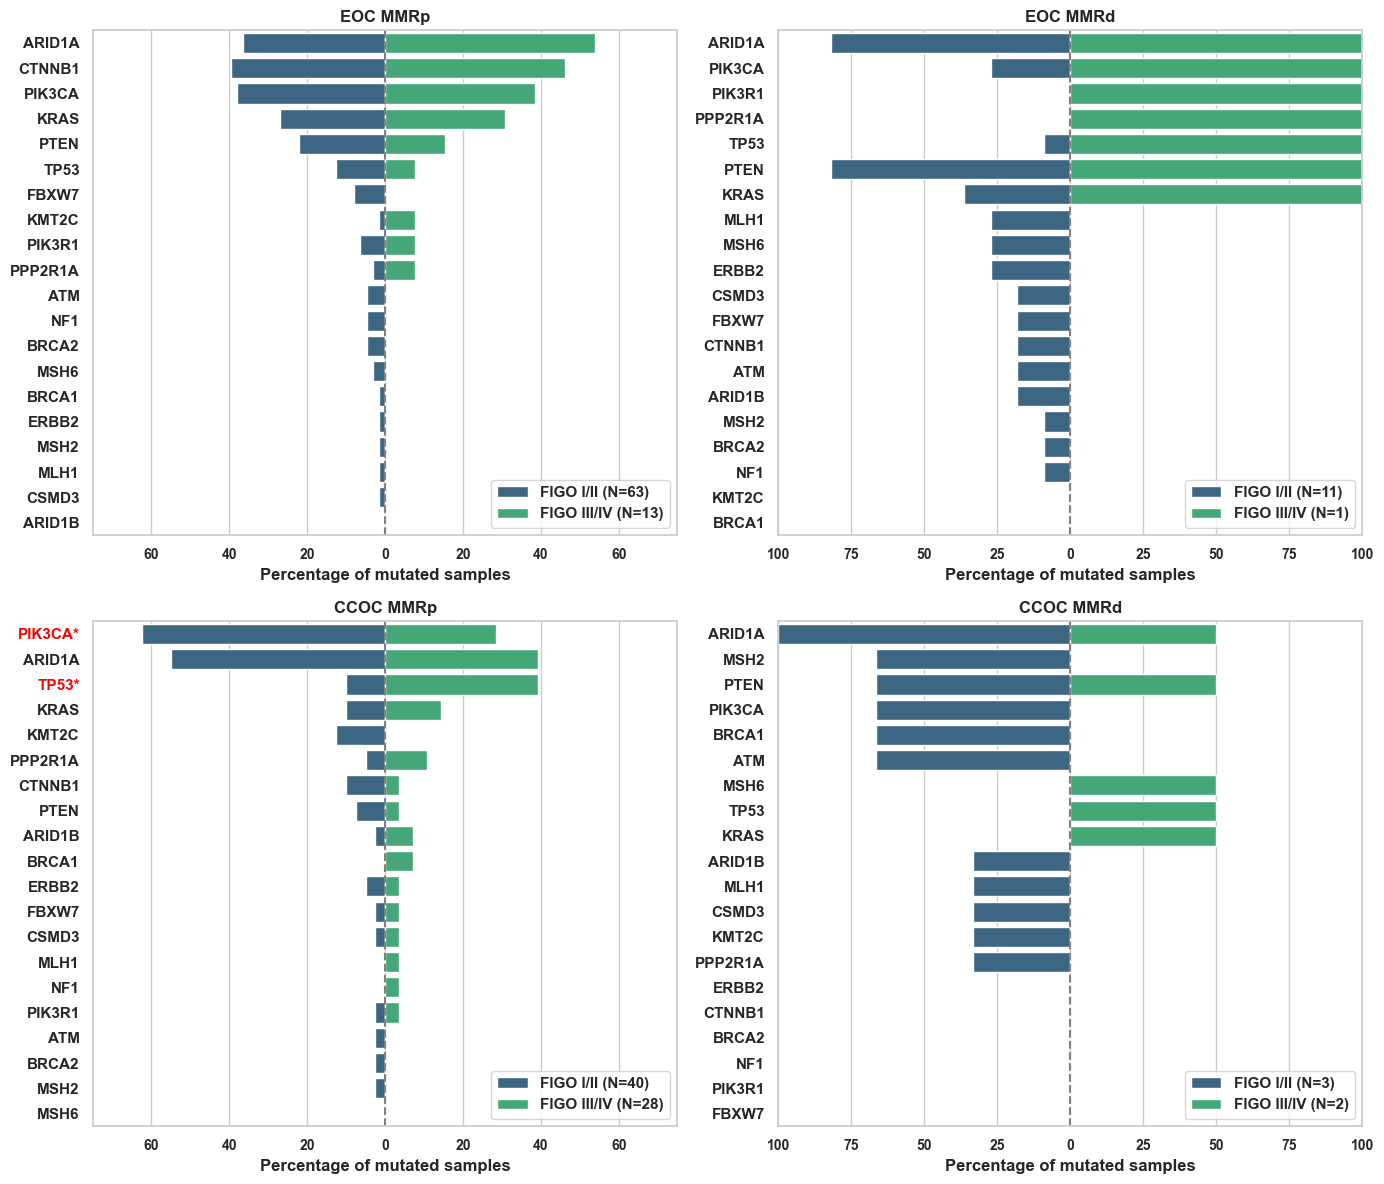

In [58]:
### BAR PLOTS WITH SIGNIFICANCE ADDED FOR EACH COMBINATION OF HISTOTYPE AND MMR STATUS ################


from matplotlib.ticker import FuncFormatter  # Import FuncFormatter to customize the formatting of axis tick labels in Matplotlib plots
# Uncomment to import if not done previously
# from scipy.stats import fisher_exact
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd


# Set the style for the plots
sns.set(style="whitegrid")

# Function to perform Fisher's Exact test for each gene and return a list of genes with significant differences
def get_significant_genes(data_figo12, data_figo34, total_figo12, total_figo34):
    significant_genes = []
    
    # Perform Fisher's Exact test for each gene
    for gene in data_figo12['Gene']:
        # Get the mutation counts for the gene in each group
        count_12 = (data_figo12.loc[data_figo12['Gene'] == gene, 'Percentage'].values[0] * total_figo12) / 100
        count_34 = (data_figo34.loc[data_figo34['Gene'] == gene, 'Percentage'].values[0] * total_figo34) / 100
        
        mutated_12 = int(count_12)
        mutated_34 = int(count_34)
        
        total_12 = total_figo12 - mutated_12
        total_34 = total_figo34 - mutated_34
        
        # Contingency table for Fisher's Exact Test
        table = [[mutated_12, total_12], [mutated_34, total_34]]
        
        # Perform the Fisher's Exact test
        _, p_value = fisher_exact(table)
        
        # If p-value is less than 0.05, consider it as significant
        if p_value < 0.05:
            significant_genes.append(gene)
    
    return significant_genes

# Function to create combined horizontal bar plots and highlight significant genes
def plot_combined_horizontal_bar(data_figo12, data_figo34, N_figo12, N_figo34, title, ax, x_limit):
    # Create a combined DataFrame for both FIGO groups
    data_figo12['Group'] = f'FIGO I/II (N={N_figo12})'
    data_figo34['Group'] = f'FIGO III/IV (N={N_figo34})'
    combined_data = pd.concat([data_figo12, data_figo34])

    # Set negative values for FIGO I/II to plot them on the left
    combined_data['Adjusted Percentage'] = combined_data.apply(
        lambda x: -x['Percentage'] if x['Group'] == f'FIGO I/II (N={N_figo12})' else x['Percentage'], axis=1
    )
    
    # Ensure the correct order of the genes to align correctly the bars for every category
    combined_data['Gene'] = pd.Categorical(
        combined_data['Gene'], 
        categories=combined_data.sort_values(by='Percentage', ascending=False)['Gene'].unique()
    )

    # Create the horizontal bar plot
    sns.barplot(x='Adjusted Percentage', y='Gene', data=combined_data, ax=ax, hue='Group', dodge=False, palette='viridis')
    
    # Set title with the total N values
    ax.set_title(f"{title}", fontweight='bold')
    ax.set_xlabel('Percentage of mutated samples', fontweight='bold')
    ax.axvline(x=0, color='gray', linestyle='--')  # Optional: Add a vertical line at x=0
    ax.set_ylabel('')  # Clear the y-label

    # Set the x limits to be the same on both sides as per specified
    ax.set_xlim(-x_limit, x_limit)

    # Get the list of significant genes
    significant_genes = get_significant_genes(data_figo12, data_figo34, N_figo12, N_figo34)

    # Customize y-axis labels
    labels = ax.get_yticklabels()  # Get current labels
    new_labels = []
    for label in labels:
        gene = label.get_text()  # Get the text (gene name) from the label
        if gene in significant_genes:
            # Modify the label: add asterisks and make it red and bold
            new_label = f"{gene}*"  # Add an asterisk
            new_labels.append(new_label)
        else:
            new_labels.append(gene)

    # Set the positions for the y-ticks and update the labels with the new ones
    ax.set_yticks(ax.get_yticks())  # Ensure the tick positions are set
    ax.set_yticklabels(new_labels, fontweight='bold')

    # Make the highlighted genes red and bold
    for i, label in enumerate(ax.get_yticklabels()):
        if label.get_text().endswith('*'):
            label.set_color('red')  # Change color to red for highlighted genes
            label.set_fontweight('bold')  # Make the label bold

    # Make x-axis numbers bold
    ax.tick_params(axis='x', which='both', labelsize=10)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')

    # Use FuncFormatter to make all values on the X-axis positive
    def positive_formatter(x, pos):
        return f'{abs(x):.0f}'  # Convert negative values to positive

    ax.xaxis.set_major_formatter(FuncFormatter(positive_formatter))

# Create a figure with subplots for both EOC and CC
fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # Adjust the figure size as needed

# Plot for each subgroup with appropriate x-axis limits
# EOC MMRp with limit -75 to 75
plot_combined_horizontal_bar(eoc_mmrp_figo12_df, eoc_mmrp_figo34_df, total_eoc_mmrp_figo12, total_eoc_mmrp_figo34, 'EOC MMRp', axs[0, 0], x_limit=75)

# EOC MMRd with limit -100 to 100
plot_combined_horizontal_bar(eoc_mmrd_figo12_df, eoc_mmrd_figo34_df, total_eoc_mmrd_figo12, total_eoc_mmrd_figo34, 'EOC MMRd', axs[0, 1], x_limit=100)

# CC MMRp with limit -75 to 75
plot_combined_horizontal_bar(cc_mmrp_figo12_df, cc_mmrp_figo34_df, total_cc_mmrp_figo12, total_cc_mmrp_figo34, 'CCOC MMRp', axs[1, 0], x_limit=75)

# CC MMRd with limit -100 to 100
plot_combined_horizontal_bar(cc_mmrd_figo12_df, cc_mmrd_figo34_df, total_cc_mmrd_figo12, total_cc_mmrd_figo34, 'CCOC MMRd', axs[1, 1], x_limit=100)

# Add legends to each subplot and position them in the bottom right
for ax in axs.flatten():
    legend = ax.legend(title='', loc='lower right', frameon=True)
    for text in legend.get_texts():
        text.set_fontweight('bold')  # Make legend text bold

# Adjust layout to prevent overlap
plt.tight_layout()
# Save the figure
plt.savefig("/home/vant/TFM/Plots_TFM_final/Drivers_percentages_FIGO_by_HISTOLOGY_MMR.png", format='png', dpi=300)
plt.show()


P-values for EOC MMRp (FIGO I/II vs FIGO III/IV):
Gene: ARID1A, p-value: 0.3507
Gene: PIK3CA, p-value: 1.0000
Gene: CTNNB1, p-value: 0.7602
Gene: KRAS, p-value: 0.7453
Gene: PTEN, p-value: 0.7235
Gene: TP53, p-value: 1.0000
Gene: PPP2R1A, p-value: 0.4351
Gene: FBXW7, p-value: 1.0000
Gene: PIK3R1, p-value: 1.0000
Gene: ATM, p-value: 1.0000
Gene: KMT2C, p-value: 0.3147
Gene: MSH6, p-value: 1.0000
Gene: ARID1B, p-value: 1.0000
Gene: ERBB2, p-value: 1.0000
Gene: NF1, p-value: 1.0000
Gene: BRCA2, p-value: 1.0000
Gene: MLH1, p-value: 1.0000
Gene: CSMD3, p-value: 1.0000
Gene: MSH2, p-value: 1.0000
Gene: BRCA1, p-value: 1.0000
P-values for EOC MMRd (FIGO I/II vs FIGO III/IV):
Gene: ARID1A, p-value: 1.0000
Gene: PIK3CA, p-value: 0.2500
Gene: CTNNB1, p-value: 1.0000
Gene: KRAS, p-value: 0.4167
Gene: PTEN, p-value: 1.0000
Gene: TP53, p-value: 0.1667
Gene: PPP2R1A, p-value: 0.0833
Gene: FBXW7, p-value: 1.0000
Gene: PIK3R1, p-value: 0.0833
Gene: ATM, p-value: 1.0000
Gene: KMT2C, p-value: 1.0000
Gen

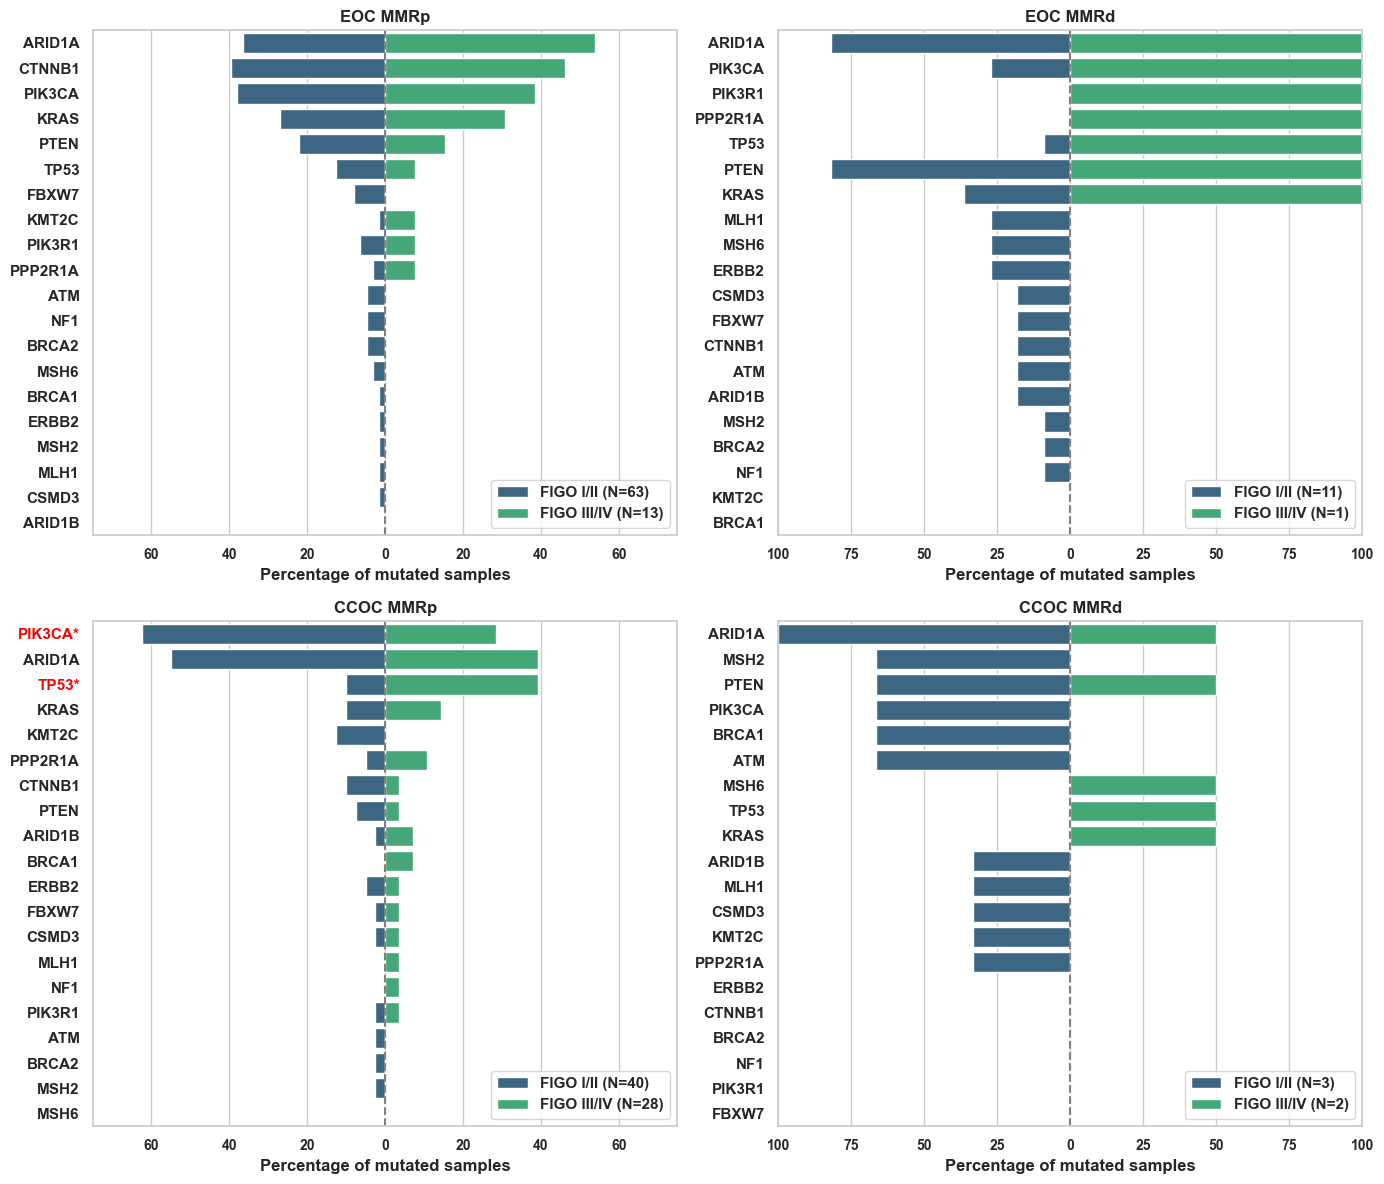

In [59]:
## BAR PLOTS WITH SIGNIFICANCE ADDED AND P-VALUES IMPRESION FOR EACH COMBINATION OF HISTOTYPE AND MMR STATUS ################

# Uncomment to import if not done previously
# from scipy.stats import fisher_exact
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
#from matplotlib.ticker import FuncFormatter

# Set the style for the plots
sns.set(style="whitegrid")

# Function to perform Fisher's Exact test for each gene and return a dictionary of genes with their p-values
def get_significant_genes_and_pvalues(data_figo12, data_figo34, total_figo12, total_figo34):
    significant_genes = []
    p_values = {}

    # Perform Fisher's Exact test for each gene
    for gene in data_figo12['Gene']:
        # Get the mutation counts for the gene in each group
        count_12 = (data_figo12.loc[data_figo12['Gene'] == gene, 'Percentage'].values[0] * total_figo12) / 100
        count_34 = (data_figo34.loc[data_figo34['Gene'] == gene, 'Percentage'].values[0] * total_figo34) / 100
        
        mutated_12 = int(count_12)
        mutated_34 = int(count_34)
        
        total_12 = total_figo12 - mutated_12
        total_34 = total_figo34 - mutated_34
        
        # Contingency table for Fisher's Exact Test
        table = [[mutated_12, total_12], [mutated_34, total_34]]
        
        # Perform the Fisher's Exact test
        _, p_value = fisher_exact(table)
        
        # Store p-value for the gene
        p_values[gene] = p_value
        
        # If p-value is less than 0.05, consider it as significant
        if p_value < 0.05:
            significant_genes.append(gene)
    
    return significant_genes, p_values

# Function to create combined horizontal bar plots and highlight significant genes
def plot_combined_horizontal_bar(data_figo12, data_figo34, N_figo12, N_figo34, title, ax, x_limit):
    # Create a combined DataFrame for both FIGO groups
    data_figo12['Group'] = f'FIGO I/II (N={N_figo12})'
    data_figo34['Group'] = f'FIGO III/IV (N={N_figo34})'
    combined_data = pd.concat([data_figo12, data_figo34])

    # Set negative values for FIGO I/II to plot them on the left
    combined_data['Adjusted Percentage'] = combined_data.apply(
        lambda x: -x['Percentage'] if x['Group'] == f'FIGO I/II (N={N_figo12})' else x['Percentage'], axis=1
    )
    
    # Ensure the correct order of the genes to align correctly the bars for every category
    combined_data['Gene'] = pd.Categorical(
        combined_data['Gene'], 
        categories=combined_data.sort_values(by='Percentage', ascending=False)['Gene'].unique()
    )

    # Create the horizontal bar plot
    sns.barplot(x='Adjusted Percentage', y='Gene', data=combined_data, ax=ax, hue='Group', dodge=False, palette='viridis')
    
    # Set title with the total N values
    ax.set_title(f"{title}", fontweight='bold')
    ax.set_xlabel('Percentage of mutated samples', fontweight='bold')
    ax.axvline(x=0, color='gray', linestyle='--')  # Optional: Add a vertical line at x=0
    ax.set_ylabel('')  # Clear the y-label

    # Set the x limits to be the same on both sides as per specified
    ax.set_xlim(-x_limit, x_limit)

    # Get the list of significant genes and their p-values
    significant_genes, p_values = get_significant_genes_and_pvalues(data_figo12, data_figo34, N_figo12, N_figo34)

    # Customize y-axis labels
    labels = ax.get_yticklabels()  # Get current labels
    new_labels = []
    for label in labels:
        gene = label.get_text()  # Get the text (gene name) from the label
        if gene in significant_genes:
            # Modify the label: add asterisks and make it red and bold
            new_label = f"{gene}*"  # Add an asterisk
            new_labels.append(new_label)
        else:
            new_labels.append(gene)

    # Set the positions for the y-ticks and update the labels with the new ones
    ax.set_yticks(ax.get_yticks())  # Ensure the tick positions are set
    ax.set_yticklabels(new_labels, fontweight='bold')

    # Make the highlighted genes red and bold
    for i, label in enumerate(ax.get_yticklabels()):
        if label.get_text().endswith('*'):
            label.set_color('red')  # Change color to red for highlighted genes
            label.set_fontweight('bold')  # Make the label bold

    # Make x-axis numbers bold
    ax.tick_params(axis='x', which='both', labelsize=10)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')

    # Use FuncFormatter to make all values on the X-axis positive
    def positive_formatter(x, pos):
        return f'{abs(x):.0f}'  # Convert negative values to positive

    ax.xaxis.set_major_formatter(FuncFormatter(positive_formatter))

    # Print the p-values outside the plot (outside the plot window)
    print(f"P-values for {title} (FIGO I/II vs FIGO III/IV):")
    for gene, p_value in p_values.items():
        print(f"Gene: {gene}, p-value: {p_value:.4f}")

# Create a figure with subplots for both EOC and CC
fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # Adjust the figure size as needed

# Plot for each subgroup with appropriate x-axis limits
# EOC MMRp with limit -75 to 75
plot_combined_horizontal_bar(eoc_mmrp_figo12_df, eoc_mmrp_figo34_df, total_eoc_mmrp_figo12, total_eoc_mmrp_figo34, 'EOC MMRp', axs[0, 0], x_limit=75)

# EOC MMRd with limit -100 to 100
plot_combined_horizontal_bar(eoc_mmrd_figo12_df, eoc_mmrd_figo34_df, total_eoc_mmrd_figo12, total_eoc_mmrd_figo34, 'EOC MMRd', axs[0, 1], x_limit=100)

# CC MMRp with limit -75 to 75
plot_combined_horizontal_bar(cc_mmrp_figo12_df, cc_mmrp_figo34_df, total_cc_mmrp_figo12, total_cc_mmrp_figo34, 'CCOC MMRp', axs[1, 0], x_limit=75)

# CC MMRd with limit -100 to 100
plot_combined_horizontal_bar(cc_mmrd_figo12_df, cc_mmrd_figo34_df, total_cc_mmrd_figo12, total_cc_mmrd_figo34, 'CCOC MMRd', axs[1, 1], x_limit=100)

# Add legends to each subplot and position them in the bottom right
for ax in axs.flatten():
    legend = ax.legend(title='', loc='lower right', frameon=True)
    for text in legend.get_texts():
        text.set_fontweight('bold')  # Make legend text bold

# Adjust layout to prevent overlap
plt.tight_layout()
# Save the figure
plt.savefig("/home/vant/TFM/Plots_TFM_final/Drivers_percentages_FIGO_by_HISTOLOGY_MMR.png", format='png', dpi=300)
plt.show()

In [60]:
#### CALCULATE PERCENTAGES OF SAMPLES MUTATED IN TOP 20 GENES IN EACH CATEGORY OF THE GRADE VARIABLE IN EOC ########

# Filter samples where 'GRADE' is not empty. 
df_var3 = df_variables.dropna(subset=['GRADE']).copy()

# Define subgroups
### EOC MMRp GRADE 1
eoc_mmrp_grade1 = df_var3[
    (df_var3['MMR_final_status'] == 'MMRp') & 
    (df_var3['HISTOLOGY'] == 0) & 
    (df_var3['GRADE'] == 1)
]
total_eoc_mmrp_grade1 = len(eoc_mmrp_grade1['ID_CNIO'].unique())
print("Total number of MMRp EOC samples (GRADE 1):", total_eoc_mmrp_grade1)

### EOC MMRp GRADE 2
eoc_mmrp_grade2 = df_var3[
    (df_var3['MMR_final_status'] == 'MMRp') & 
    (df_var3['HISTOLOGY'] == 0) & 
    (df_var3['GRADE'] == 2)
]
total_eoc_mmrp_grade2 = len(eoc_mmrp_grade2['ID_CNIO'].unique())
print("Total number of MMRp EOC samples (GRADE 2):", total_eoc_mmrp_grade2)

### EOC MMRp GRADE 3
eoc_mmrp_grade3 = df_var3[
    (df_var3['MMR_final_status'] == 'MMRp') & 
    (df_var3['HISTOLOGY'] == 0) & 
    (df_var3['GRADE'] == 3)
]
total_eoc_mmrp_grade3 = len(eoc_mmrp_grade3['ID_CNIO'].unique())
print("Total number of MMRp EOC samples (GRADE 3):", total_eoc_mmrp_grade3)

### EOC MMRd GRADE 1
eoc_mmrd_grade1 = df_var3[
    (df_var3['MMR_final_status'] == 'MMRd') & 
    (df_var3['HISTOLOGY'] == 0) & 
    (df_var3['GRADE'] == 1)
]
total_eoc_mmrd_grade1 = len(eoc_mmrd_grade1['ID_CNIO'].unique())
print("Total number of MMRd EOC samples (GRADE 1):", total_eoc_mmrd_grade1)

### EOC MMRd GRADE 2
eoc_mmrd_grade2 = df_var3[
    (df_var3['MMR_final_status'] == 'MMRd') & 
    (df_var3['HISTOLOGY'] == 0) & 
    (df_var3['GRADE'] == 2)
]
total_eoc_mmrd_grade2 = len(eoc_mmrd_grade2['ID_CNIO'].unique())
print("Total number of MMRd EOC samples (GRADE 2):", total_eoc_mmrd_grade2)

### EOC MMRd GRADE 3
eoc_mmrd_grade3 = df_var3[
    (df_var3['MMR_final_status'] == 'MMRd') & 
    (df_var3['HISTOLOGY'] == 0) & 
    (df_var3['GRADE'] == 3)
]
total_eoc_mmrd_grade3 = len(eoc_mmrd_grade3['ID_CNIO'].unique())
print("Total number of MMRd EOC samples (GRADE 3):", total_eoc_mmrd_grade3)

Total number of MMRp EOC samples (GRADE 1): 41
Total number of MMRp EOC samples (GRADE 2): 23
Total number of MMRp EOC samples (GRADE 3): 8
Total number of MMRd EOC samples (GRADE 1): 5
Total number of MMRd EOC samples (GRADE 2): 4
Total number of MMRd EOC samples (GRADE 3): 2


In [61]:
### Filter to keep the mutations in every subgroup
eoc_mmrp_grade1_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrp_grade1['ID_CNIO']))
]
eoc_mmrp_grade2_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrp_grade2['ID_CNIO']))
]
eoc_mmrp_grade3_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrp_grade3['ID_CNIO']))
]
eoc_mmrd_grade1_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRd') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrd_grade1['ID_CNIO']))
]
eoc_mmrd_grade2_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRd') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrd_grade2['ID_CNIO']))
]
eoc_mmrd_grade3_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRd') &
    (mutations_subset_unique['Sample'].isin(eoc_mmrd_grade3['ID_CNIO']))
]

## Calculate gene percentages (function previously created)
eoc_mmrp_grade1_percentages = calculate_gene_percentage(eoc_mmrp_grade1_mut, total_eoc_mmrp_grade1)
eoc_mmrp_grade2_percentages = calculate_gene_percentage(eoc_mmrp_grade2_mut, total_eoc_mmrp_grade2)
eoc_mmrp_grade3_percentages = calculate_gene_percentage(eoc_mmrp_grade3_mut, total_eoc_mmrp_grade3)
eoc_mmrd_grade1_percentages = calculate_gene_percentage(eoc_mmrd_grade1_mut, total_eoc_mmrd_grade1)
eoc_mmrd_grade2_percentages = calculate_gene_percentage(eoc_mmrd_grade2_mut, total_eoc_mmrd_grade2)
eoc_mmrd_grade3_percentages = calculate_gene_percentage(eoc_mmrd_grade3_mut, total_eoc_mmrd_grade3)

In [62]:
# Create dataframes with Genes and Percentages
eoc_mmrp_grade1_df = pd.DataFrame({'Gene': eoc_mmrp_grade1_percentages.index, 'Percentage': eoc_mmrp_grade1_percentages.values})
eoc_mmrp_grade2_df = pd.DataFrame({'Gene': eoc_mmrp_grade2_percentages.index, 'Percentage': eoc_mmrp_grade2_percentages.values})
eoc_mmrp_grade3_df = pd.DataFrame({'Gene': eoc_mmrp_grade3_percentages.index, 'Percentage': eoc_mmrp_grade3_percentages.values})
eoc_mmrd_grade1_df = pd.DataFrame({'Gene': eoc_mmrd_grade1_percentages.index, 'Percentage': eoc_mmrd_grade1_percentages.values})
eoc_mmrd_grade2_df = pd.DataFrame({'Gene': eoc_mmrd_grade2_percentages.index, 'Percentage': eoc_mmrd_grade2_percentages.values})
eoc_mmrd_grade3_df = pd.DataFrame({'Gene': eoc_mmrd_grade3_percentages.index, 'Percentage': eoc_mmrd_grade3_percentages.values})

# Reorder dataframes
eoc_mmrp_grade1_df = eoc_mmrp_grade1_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrp_grade2_df = eoc_mmrp_grade2_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrp_grade3_df = eoc_mmrp_grade3_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

eoc_mmrd_grade1_df = eoc_mmrd_grade1_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrd_grade2_df = eoc_mmrd_grade2_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrd_grade3_df = eoc_mmrd_grade3_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

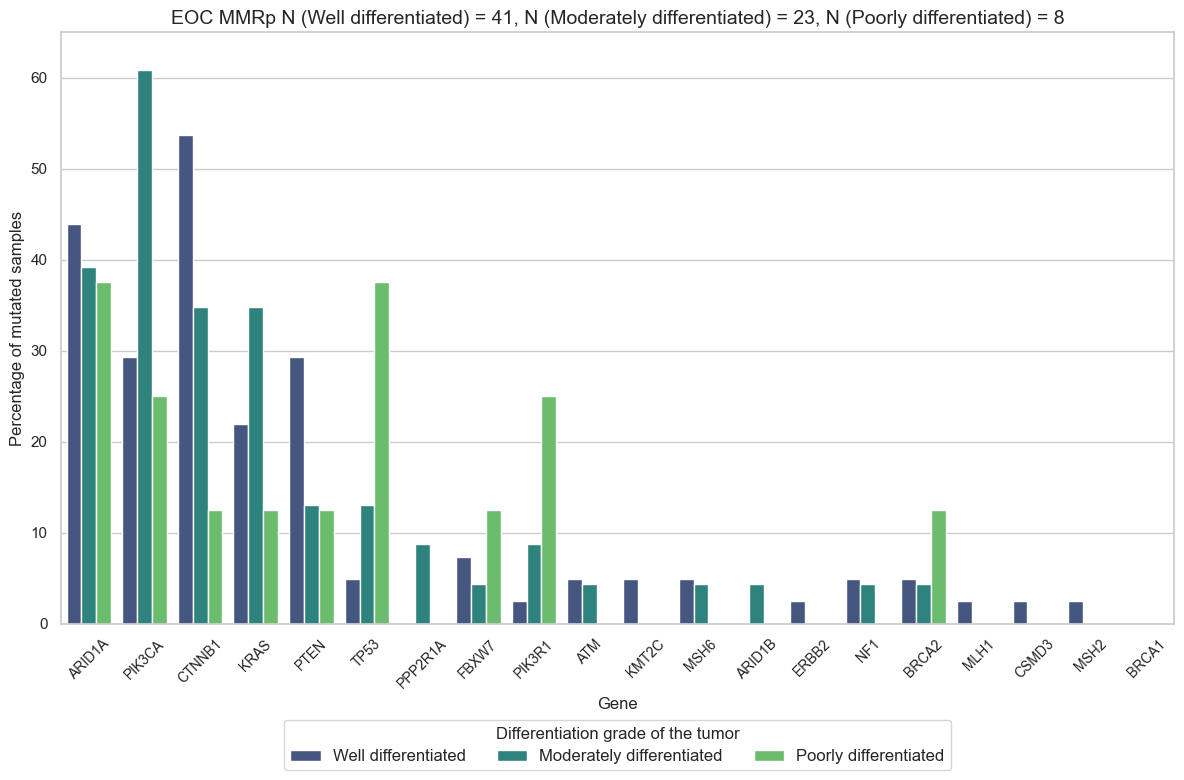

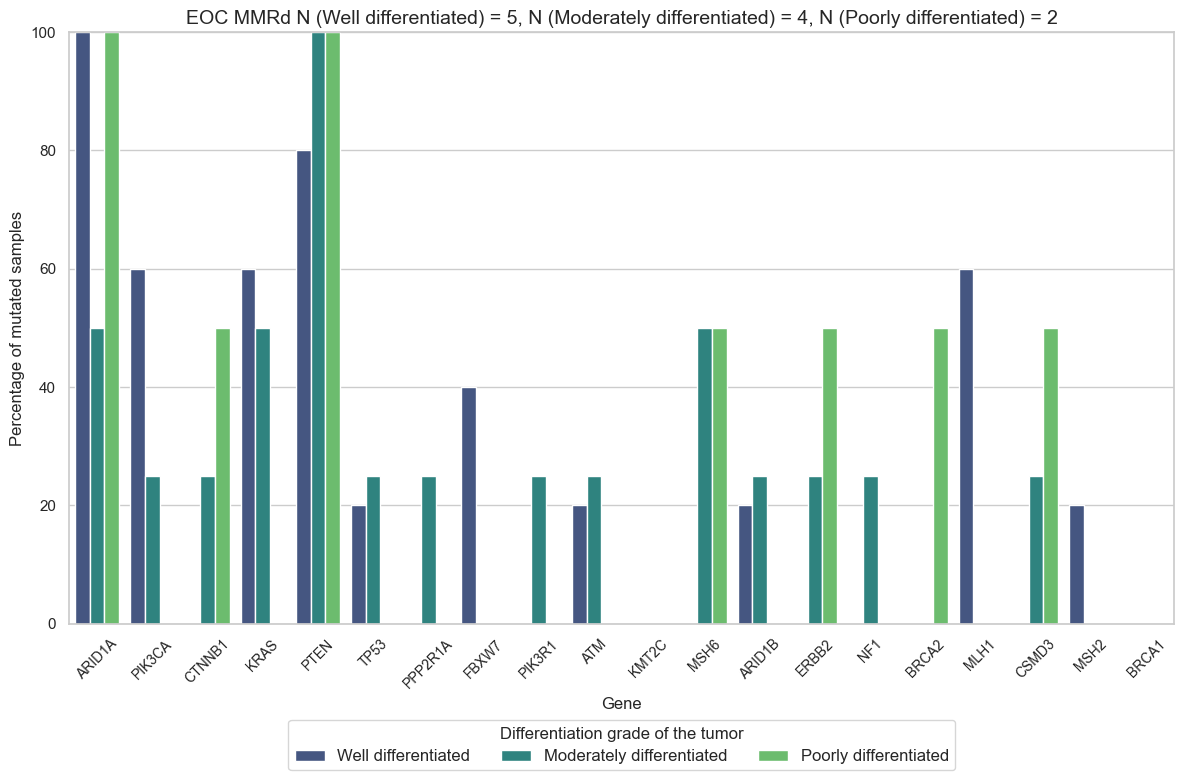

In [63]:
### SIMPLE BAR PLOTS SHOWING THE COMPARATIVE OF SAMPLES MUTATED IN THE TOP 20 GENES IN EACH GRADE CATEGORY IN EOC ##########

# Uncomment to import if not done previously
#import seaborn as sns
#import matplotlib.pyplot as plt
#import pandas as pd

# Set style for the plots
sns.set(style="whitegrid")

# Define a function to plot vertical bar charts for GRADE subgroups with customized legend names
def plot_vertical_bar(data_grade1, data_grade2, data_grade3, N_grade1, N_grade2, N_grade3, title, y_limit):
    # Add GRADE group labels to each DataFrame
    data_grade1['Group'] = 'Well differentiated'
    data_grade2['Group'] = 'Moderately differentiated'
    data_grade3['Group'] = 'Poorly differentiated'
    
    # Combine all GRADE data into a single DataFrame
    combined_data = pd.concat([data_grade1, data_grade2, data_grade3])

    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed

    # Plot the vertical bar chart with bars for each GRADE aligned by Gene
    sns.barplot(x='Gene', y='Percentage', data=combined_data, ax=ax, hue='Group', palette='viridis', dodge=True)

    # Set the title with N values for each GRADE subgroup
    ax.set_title(f"{title} N (Well differentiated) = {N_grade1}, N (Moderately differentiated) = {N_grade2}, N (Poorly differentiated) = {N_grade3}", fontsize=14)
    ax.set_ylabel('Percentage of mutated samples', fontsize=12)
    ax.set_xlabel('Gene', fontsize=12)
    
    # Limit y-axis range
    ax.set_ylim(0, y_limit)
    ax.tick_params(axis='x', labelsize=10, rotation=45)  # Rotate x-axis labels for better readability

    # Add a legend and position it below the plot
    legend = ax.legend(title='Differentiation grade of the tumor', loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=True, ncol=3)
    for text in legend.get_texts():
        text.set_fontsize(12)  # Adjust font size in the legend

    # Adjust layout for a clean look
    plt.tight_layout()

    # Save and display the plot
    plt.savefig(f"{title.replace(' ', '_')}_percentages_GRADE.png", format='png',dpi=300)
    plt.show()

# Plot EOC MMRp with y-axis limit of 65
plot_vertical_bar(
    eoc_mmrp_grade1_df, eoc_mmrp_grade2_df, eoc_mmrp_grade3_df, 
    total_eoc_mmrp_grade1, total_eoc_mmrp_grade2, total_eoc_mmrp_grade3, 
    'EOC MMRp', y_limit=65
)

# Plot EOC MMRd with y-axis limit of 100
plot_vertical_bar(
    eoc_mmrd_grade1_df, eoc_mmrd_grade2_df, eoc_mmrd_grade3_df, 
    total_eoc_mmrd_grade1, total_eoc_mmrd_grade2, total_eoc_mmrd_grade3, 
    'EOC MMRd', y_limit=100
)


In [64]:
##### ANALYSE GRADE GROUPING MODERATELY AND POORLY DIFFERENTIATED CASES IN ALL EOC CASES (MMRp+MMRd) ##############

# Create a filtered copy of df_variables where 'GRADE' is not empty 
df_var4 = df_variables.dropna(subset=['GRADE']).copy()

# Create a new column 'GRADE_GROUP' with specified names for each grade category
df_var4['GRADE_GROUP'] = df_var4['GRADE'].map({
    1: 'Well differentiated', 
    2: 'Moderately-Poorly differentiated',
    3: 'Moderately-Poorly differentiated'
})

# Define subgroups using the new 'GRADE_GROUP' column

### EOC Well differentiated (corresponds to GRADE 1)
eoc_well_diff = df_var4[
    (df_var4['HISTOLOGY'] == 0) & 
    (df_var4['GRADE_GROUP'] == 'Well differentiated')
]
# Count unique samples for EOC in the "Well differentiated" category
total_eoc_well_diff = len(eoc_well_diff['ID_CNIO'].unique())
print("Total number of EOC samples (Well differentiated):", total_eoc_well_diff)

### EOC Moderately-Poorly differentiated (corresponds to combined GRADE 2 and 3)
eoc_mod_poor_diff = df_var4[
    (df_var4['HISTOLOGY'] == 0) & 
    (df_var4['GRADE_GROUP'] == 'Moderately-Poorly differentiated')
]
# Count unique samples for EOC in the "Moderately-Poorly differentiated" category
total_eoc_mod_poor_diff = len(eoc_mod_poor_diff['ID_CNIO'].unique())
print("Total number of EOC samples (Moderately-Poorly differentiated):", total_eoc_mod_poor_diff)

Total number of EOC samples (Well differentiated): 46
Total number of EOC samples (Moderately-Poorly differentiated): 37


In [65]:
### Filter to keep the mutations in every subgroup
eoc_well_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_well_diff['ID_CNIO']))
]
eoc_mod_poor_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_mod_poor_diff['ID_CNIO']))
]
## Calculate gene percentages (function previously created)
eoc_well_percentages = calculate_gene_percentage(eoc_well_mut, total_eoc_well_diff)
eoc_mod_poor_percentages = calculate_gene_percentage(eoc_mod_poor_mut, total_eoc_mod_poor_diff)
print("EOC well percentages:",eoc_well_percentages)
print("EOC mod-poor percentages:",eoc_mod_poor_percentages)

EOC well percentages: Gene
ARID1A     50.000000
CTNNB1     47.826087
PTEN       34.782609
PIK3CA     32.608696
KRAS       26.086957
FBXW7      10.869565
MLH1        8.695652
AKT1        6.521739
APC         6.521739
ATM         6.521739
TP53        6.521739
DOCK3       4.347826
FGFR2       4.347826
ATRX        4.347826
NF1         4.347826
MSH3        4.347826
MSH6        4.347826
KMT2C       4.347826
RPL22       4.347826
WDTC1       4.347826
TEAD2       4.347826
MSH2        4.347826
ACVR2A      4.347826
BRCA2       4.347826
ARID1B      2.173913
SLC3A2      2.173913
EGFR        2.173913
BRIP1       2.173913
WASF3       2.173913
ERBB2       2.173913
BAX         2.173913
SMARCA4     2.173913
ERCC3       2.173913
KDM5C       2.173913
TSC1        2.173913
JAK1        2.173913
PALB2       2.173913
CSMD3       2.173913
RNF43       2.173913
PIK3R1      2.173913
POLE        2.173913
FAT4        2.173913
POLQ        2.173913
BARD1       2.173913
MAP2K1      2.173913
ALK         2.173913
XYLT2  

In [66]:
# Create dataframes with Genes and Percentages in every category
eoc_well_df = pd.DataFrame({'Gene': eoc_well_percentages.index, 'Percentage': eoc_well_percentages.values})
eoc_mod_poor_df = pd.DataFrame({'Gene': eoc_mod_poor_percentages.index, 'Percentage': eoc_mod_poor_percentages.values})

# Reorder dataframes
eoc_well_df = eoc_well_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mod_poor_df = eoc_mod_poor_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

In [67]:
### TESTS TO CHECK IF THERE ARE DIFFERENTIALLY MUTATED GENES IN EOC BETWEEN GROUPED GRADE CATEGORIES ############
##  USING FISHER'S EXACT TEST #####

# Uncomment to import if not done previously
# from scipy.stats import fisher_exact

# Total number of samples in each group 
print(total_eoc_well_diff)
print(total_eoc_mod_poor_diff)

# Dictionary with gene mutation percentages for each group
gene_data = {
    'ARID1A': (50, 43.24),
    'PIK3CA': (32.61, 45.95),
    'CTNNB1': (47.83, 29.73),
    'KRAS': (26.09, 29.73),
    'PTEN': (34.78, 27.03),
    'TP53': (6.52, 18.92),
    'PIK3R1': (2.17, 13.51),
    'FBXW7': (10.87, 5.41),
    'MSH6': (4.35, 10.81),
    'BRCA2': (4.35, 8.11)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (eoc_well_percentages, eoc_mod_poor_percentages) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_well = int(round( eoc_well_percentages / 100 * total_eoc_well_diff))
    not_mutated_well = total_eoc_well_diff- mutated_well
    mutated_modpoor = int(round( eoc_mod_poor_percentages / 100 * total_eoc_mod_poor_diff))
    not_mutated_modpoor = total_eoc_mod_poor_diff - mutated_modpoor

    # Create the contingency table
    table = [[mutated_well, not_mutated_well], [mutated_modpoor, not_mutated_modpoor]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the groups.")
    else:
        print("There is no significant difference in mutation proportions between the groups.")
    print("----------")

46
37
Gene: ARID1A
Odds ratio: 1.3125
p-value: 0.6588868968494047
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3CA
Odds ratio: 0.5692599620493358
p-value: 0.25979630366169315
There is no significant difference in mutation proportions between the groups.
----------
Gene: CTNNB1
Odds ratio: 2.1666666666666665
p-value: 0.11677384546997466
There is no significant difference in mutation proportions between the groups.
----------
Gene: KRAS
Odds ratio: 0.8342245989304813
p-value: 0.8067322767824328
There is no significant difference in mutation proportions between the groups.
----------
Gene: PTEN
Odds ratio: 1.44
p-value: 0.4844959355277641
There is no significant difference in mutation proportions between the groups.
----------
Gene: TP53
Odds ratio: 0.29900332225913623
p-value: 0.10161247866597789
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3R1
Odds ratio: 0.14222222222222222
p-val

/tmp/ipykernel_6402/2074660659.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels, fontsize=10)



P-values for EOC:
Gene: ARID1A, p-value: 0.6589
Gene: PIK3CA, p-value: 0.2598
Gene: CTNNB1, p-value: 0.1168
Gene: KRAS, p-value: 0.8067
Gene: PTEN, p-value: 0.4845
Gene: TP53, p-value: 0.1016
Gene: PPP2R1A, p-value: 0.0846
Gene: FBXW7, p-value: 0.4531
Gene: PIK3R1, p-value: 0.0841
Gene: ATM, p-value: 1.0000
Gene: KMT2C, p-value: 0.4999
Gene: MSH6, p-value: 0.3996
Gene: ARID1B, p-value: 0.5832
Gene: ERBB2, p-value: 0.5832
Gene: NF1, p-value: 1.0000
Gene: BRCA2, p-value: 0.6518
Gene: MLH1, p-value: 0.1247
Gene: CSMD3, p-value: 0.5832
Gene: MSH2, p-value: 0.4999
Gene: BRCA1, p-value: 1.0000


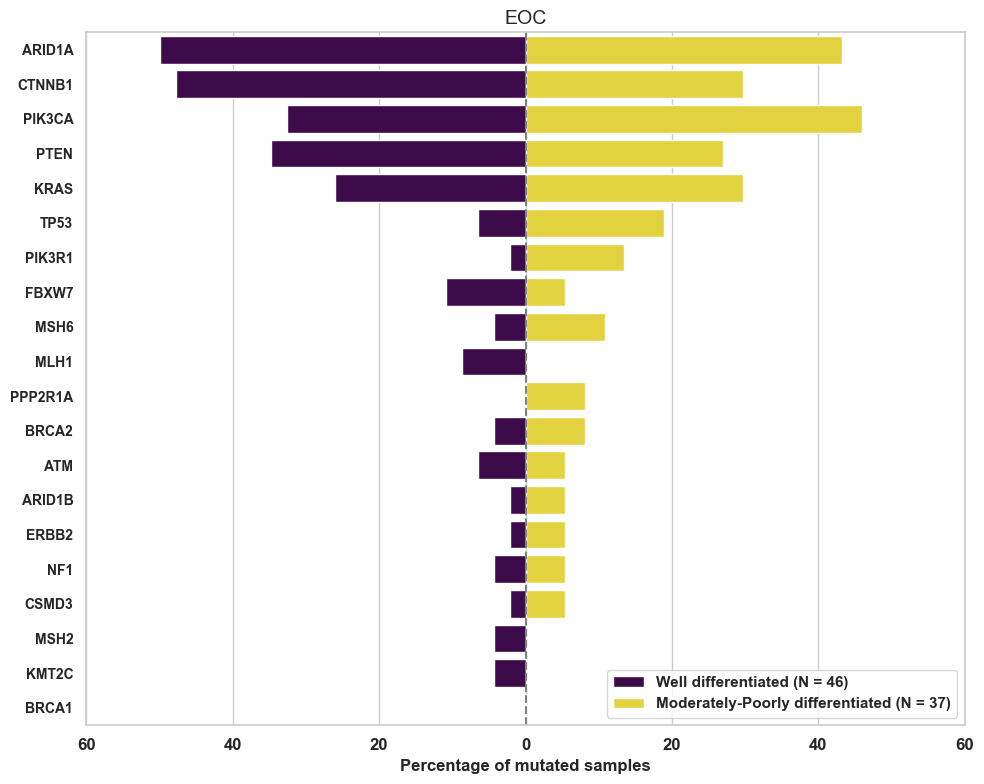

In [68]:
### BARPLOTS WITH SIGNIFICANCE INFORMATION OF DIFFERENTLY FREQUENTLY MUTATED GENES IN EOC (MMRp+MMRd) BETWEEN GRADE CATEGORIES #######

# Uncomment to import if not done previousl
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
#from matplotlib.ticker import FuncFormatter
#from scipy.stats import fisher_exact

# Set style for the plots
sns.set(style="whitegrid")

# Define a function to perform Fisher's Exact Test for each gene and return significant genes
def get_significant_genes_and_pvalues(data_well, data_mod_poor, N_well, N_mod_poor):
    significant_genes = []
    p_values = {}

    # Perform Fisher's Exact test for each gene
    for gene in data_well['Gene']:
        # Get the mutation counts for the gene in each group
        count_well = (data_well.loc[data_well['Gene'] == gene, 'Percentage'].values[0] * N_well) / 100
        count_mod_poor = (data_mod_poor.loc[data_mod_poor['Gene'] == gene, 'Percentage'].values[0] * N_mod_poor) / 100
        
        mutated_well = int(count_well)
        mutated_mod_poor = int(count_mod_poor)
        
        total_well = N_well - mutated_well
        total_mod_poor = N_mod_poor - mutated_mod_poor
        
        # Contingency table for Fisher's Exact Test
        table = [[mutated_well, total_well], [mutated_mod_poor, total_mod_poor]]
        
        # Perform the Fisher's Exact test
        _, p_value = fisher_exact(table)
        
        # Store p-value for the gene
        p_values[gene] = p_value
        
        # If p-value is less than 0.05, consider it as significant
        if p_value < 0.05:
            significant_genes.append(gene)
    
    return significant_genes, p_values

# Define a function to plot horizontal bar charts for GRADE subgroups with customized legend names
def plot_horizontal_bar(data_well, data_mod_poor, N_well, N_mod_poor, title, x_limit):
    # Add GRADE group labels to each DataFrame
    data_well['Group'] = 'Well differentiated (N = {})'.format(N_well)
    data_mod_poor['Group'] = 'Moderately-Poorly differentiated (N = {})'.format(N_mod_poor)
    
    # Combine all GRADE data into a single DataFrame
    combined_data = pd.concat([data_well, data_mod_poor])

    # Assign negative values for "Well differentiated" to plot it on the left side
    combined_data['Adjusted Percentage'] = combined_data.apply(
        lambda x: -x['Percentage'] if x['Group'].startswith('Well differentiated') else x['Percentage'], axis=1
    )
    
    # Order genes to align correctly the bars in the Y axis
    combined_data['Gene'] = pd.Categorical(
        combined_data['Gene'], 
        categories=combined_data.sort_values(by='Percentage', ascending=False)['Gene'].unique()
    )

    # Get the list of significant genes and their p-values
    significant_genes, p_values = get_significant_genes_and_pvalues(data_well, data_mod_poor, N_well, N_mod_poor)

    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed

    # Plot the horizontal bar chart
    sns.barplot(
        x='Adjusted Percentage', y='Gene', data=combined_data, ax=ax, hue='Group', dodge=False, palette=['#440154', '#fde725']
    )
    
    # Set the title
    ax.set_title(f"{title}", fontsize=14)

    # Customize labels
    ax.set_xlabel('Percentage of mutated samples', fontsize=12, fontweight='bold')
    ax.set_ylabel('')  # Remove y-axis label for clarity
    ax.axvline(x=0, color='gray', linestyle='--')  # Vertical line at x=0 for separation

    # Customize y-axis labels: bold and specific styling for significant genes
    y_labels = []
    for label in ax.get_yticklabels():
        gene_name = label.get_text()
        if gene_name in significant_genes:
            label.set_text(f"{gene_name}*")  # Add asterisk for significant genes
            label.set_color('red')  # Make significant genes red
            label.set_fontweight('bold')  # Make significant genes bold
        else:
            label.set_fontweight('bold')  # Other genes also bold
        y_labels.append(label)
    
    # Set the y-tick labels after processing
    ax.set_yticklabels(y_labels, fontsize=10)

    # Limit x-axis range to be symmetrical
    ax.set_xlim(-x_limit, x_limit)

    # Customize x-axis labels: bold
    ax.tick_params(axis='x', labelsize=12, labelrotation=0, which='both')  
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')

    # Use FuncFormatter to make all values on the X-axis positive
    def positive_formatter(x, pos):
        return f'{abs(x):.0f}'  # Convert negative values to positive

    ax.xaxis.set_major_formatter(FuncFormatter(positive_formatter))

    # Add a legend and position it inside the plot at the bottom-right, with two rows
    legend = ax.legend(
        loc='lower right',  # Location inside the plot
        bbox_to_anchor=(1, 0),  # Position it inside the graph, top-right
        frameon=True, 
        ncol=1,  # Two columns (one for each category)
        fontsize=12,
        title_fontsize='13',  # Make title slightly larger
        prop={'weight': 'bold'}  # Set the legend text to bold
    )

    # Adjust layout for a clean look
    plt.tight_layout()

    # **DEBUG: Print the p-values to ensure they are being calculated**
    print(f"\nP-values for {title}:")
    for gene, p_value in p_values.items():
        print(f"Gene: {gene}, p-value: {p_value:.4f}")

    # Save and display the plot
    plt.savefig(f"/home/vant/TFM/Plots_TFM_final/Drivers_{title}_GRADE_grouped_mediumhigh_legend_inside_2rows_bold_legend.png", format='png', dpi=300)
    plt.show()

# Example usage:
# Plot EOC well differentiated with x-axis limit -60 to 60
plot_horizontal_bar(
    eoc_well_df, eoc_mod_poor_df, 
    total_eoc_well_diff, total_eoc_mod_poor_diff, 
    'EOC', x_limit=60
)

In [69]:
#### CALCULATE PERCENTAGES OF SAMPLES MUTATED IN TOP 20 GENES FOR GRADE VARIABLE IN EOC MMRp ########

# Filter samples where 'GRADE' is not empty
df_var5 = df_variables.dropna(subset=['GRADE']).copy()

# Create a new column 'GRADE_GROUP' with specified names for each grade category
df_var5['GRADE_GROUP'] = df_var5['GRADE'].map({
    1: 'Well differentiated', 
    2: 'Moderately-Poorly differentiated',
    3: 'Moderately-Poorly differentiated'
})

# Define subgroups using the new 'GRADE_GROUP' column

### EOC MMRp Well differentiated
eoc_well_mmrp = df_var5[
    (df_var5['MMR_final_status'] == 'MMRp') & 
    (df_var5['HISTOLOGY'] == 0) & 
    (df_var5['GRADE_GROUP'] == 'Well differentiated')
]
total_eoc_well_mmrp = len(eoc_well_mmrp['ID_CNIO'].unique())
print("Total number of EOC MMRp samples (GRADE Well-differentiated):", total_eoc_well_mmrp)

### EOC MMRp Moderately-Poorly differentiated (combined GRADE 2 and 3)
eoc_mod_poor_mmrp = df_var5[
    (df_var5['MMR_final_status'] == 'MMRp') & 
    (df_var5['HISTOLOGY'] == 0) & 
    (df_var5['GRADE_GROUP'] == 'Moderately-Poorly differentiated')
]
total_eoc_mod_poor_mmrp = len(eoc_mod_poor_mmrp['ID_CNIO'].unique())
print("Total number of MMRp EOC samples (GRADE Moderately-Poorly differentiated):", total_eoc_mod_poor_mmrp)


Total number of EOC MMRp samples (GRADE Well-differentiated): 41
Total number of MMRp EOC samples (GRADE Moderately-Poorly differentiated): 31


In [70]:
### Filter to keep the mutations in every subgroup
eoc_well_mmrp_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(eoc_well_mmrp['ID_CNIO']))
]
eoc_mod_poor_mmrp_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['MMR_final_status'] == 'MMRp') &
    (mutations_subset_unique['Sample'].isin(eoc_mod_poor_mmrp['ID_CNIO']))
]
## Calculate gene percentages (function previously created)
eoc_well_mmrp_percentages = calculate_gene_percentage(eoc_well_mmrp_mut, total_eoc_well_mmrp)
eoc_mod_poor_mmrp_percentages = calculate_gene_percentage(eoc_mod_poor_mmrp_mut, total_eoc_mod_poor_mmrp)
print("EOC MMRp well percentages:",eoc_well_mmrp_percentages)
print("EOC MMRp mod-poor percentages:",eoc_mod_poor_mmrp_percentages)

EOC MMRp well percentages: Gene
CTNNB1     53.658537
ARID1A     43.902439
PIK3CA     29.268293
PTEN       29.268293
KRAS       21.951220
FBXW7       7.317073
AKT1        7.317073
ATRX        4.878049
NF1         4.878049
ATM         4.878049
KMT2C       4.878049
MSH6        4.878049
TP53        4.878049
BRCA2       4.878049
FGFR2       4.878049
KDM5C       2.439024
BAX         2.439024
SMARCA4     2.439024
ERBB2       2.439024
EGFR        2.439024
MLH1        2.439024
RNF43       2.439024
PIK3R1      2.439024
MAP2K1      2.439024
POLE        2.439024
CSMD3       2.439024
FAT4        2.439024
POLQ        2.439024
BARD1       2.439024
APC         2.439024
MSH2        2.439024
ALK         2.439024
PALB2       2.439024
Name: count, dtype: float64
EOC MMRp mod-poor percentages: Gene
PIK3CA     51.612903
ARID1A     38.709677
KRAS       29.032258
CTNNB1     29.032258
TP53       19.354839
PTEN       12.903226
PIK3R1     12.903226
SPOP        9.677419
PPP2R1A     6.451613
BRCA2       6.451613
N

In [71]:
# Create dataframes with Genes and Percentages
eoc_well_mmrp_df = pd.DataFrame({'Gene': eoc_well_mmrp_percentages.index, 'Percentage': eoc_well_mmrp_percentages.values})
eoc_mod_poor_mmrp_df = pd.DataFrame({'Gene': eoc_mod_poor_mmrp_percentages.index, 'Percentage': eoc_mod_poor_mmrp_percentages.values})

# Reorder dataframes
eoc_well_mmrp_df = eoc_well_mmrp_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mod_poor_mmrp_df = eoc_mod_poor_mmrp_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

In [72]:
###### TESTS TO CHECK IF THERE ARE DIFFERENTIALLY MUTATED GENES IN EOC MMRp BETWEEN GROUPED GRADE CATEGORIES ############
## EOC MMRp GRADE FISHER'S EXACT TEST #####

# Uncomment to import if not done previously
# from scipy.stats import fisher_exact

# Total number of samples 
print(total_eoc_well_mmrp)
print(total_eoc_mod_poor_mmrp)

# Dictionary with gene mutation percentages for each group
gene_data = {
    'ARID1A': (43.9, 38.71),
    'PIK3CA': (29.27, 51.61),
    'CTNNB1': (53.66, 29.03),
    'KRAS': (21.95, 29.03),
    'PTEN': (29.27, 12.9),
    'TP53': (4.88, 19.35),
    'PIK3R1': (2.44, 12.9),
    'FBXW7': (7.32, 6.45),
    'MSH6': (4.88, 3.23),
    'BRCA2': (4.88, 6.45)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (eoc_well_mmrp_percentages, eoc_mod_poor_mmrp_percentages) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_well_mmrp = int(round( eoc_well_mmrp_percentages / 100 * total_eoc_well_mmrp))
    not_mutated_well_mmrp = total_eoc_well_mmrp- mutated_well_mmrp
    mutated_modpoor_mmrp = int(round( eoc_mod_poor_mmrp_percentages / 100 * total_eoc_mod_poor_mmrp))
    not_mutated_modpoor_mmrp = total_eoc_mod_poor_mmrp - mutated_modpoor_mmrp

    # Create the contingency table
    table = [[mutated_well_mmrp, not_mutated_well_mmrp], [mutated_modpoor_mmrp, not_mutated_modpoor_mmrp]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the groups.")
    else:
        print("There is no significant difference in mutation proportions between the groups.")
    print("----------")

41
31
Gene: ARID1A
Odds ratio: 1.2391304347826086
p-value: 0.8097180554178385
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3CA
Odds ratio: 0.3879310344827586
p-value: 0.08672079573127248
There is no significant difference in mutation proportions between the groups.
----------
Gene: CTNNB1
Odds ratio: 2.8304093567251463
p-value: 0.05429791770488253
There is no significant difference in mutation proportions between the groups.
----------
Gene: KRAS
Odds ratio: 0.6875
p-value: 0.5860192611832437
There is no significant difference in mutation proportions between the groups.
----------
Gene: PTEN
Odds ratio: 2.793103448275862
p-value: 0.15202648433751353
There is no significant difference in mutation proportions between the groups.
----------
Gene: TP53
Odds ratio: 0.21367521367521367
p-value: 0.06809247656683688
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3R1
Odds ratio: 0.16875
p-v


P-values for EOC MMRp:
Gene: ARID1A, p-value: 0.8097
Gene: PIK3CA, p-value: 0.0867
Gene: CTNNB1, p-value: 0.0543
Gene: KRAS, p-value: 0.5860
Gene: PTEN, p-value: 0.1520
Gene: TP53, p-value: 0.0681
Gene: PPP2R1A, p-value: 0.1819
Gene: FBXW7, p-value: 1.0000
Gene: PIK3R1, p-value: 0.1579
Gene: ATM, p-value: 1.0000
Gene: KMT2C, p-value: 0.5027
Gene: MSH6, p-value: 1.0000
Gene: ARID1B, p-value: 0.4306
Gene: ERBB2, p-value: 1.0000
Gene: NF1, p-value: 1.0000
Gene: BRCA2, p-value: 1.0000
Gene: MLH1, p-value: 1.0000
Gene: CSMD3, p-value: 1.0000
Gene: MSH2, p-value: 1.0000
Gene: BRCA1, p-value: 1.0000


/tmp/ipykernel_6402/3793013382.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels, fontsize=10)


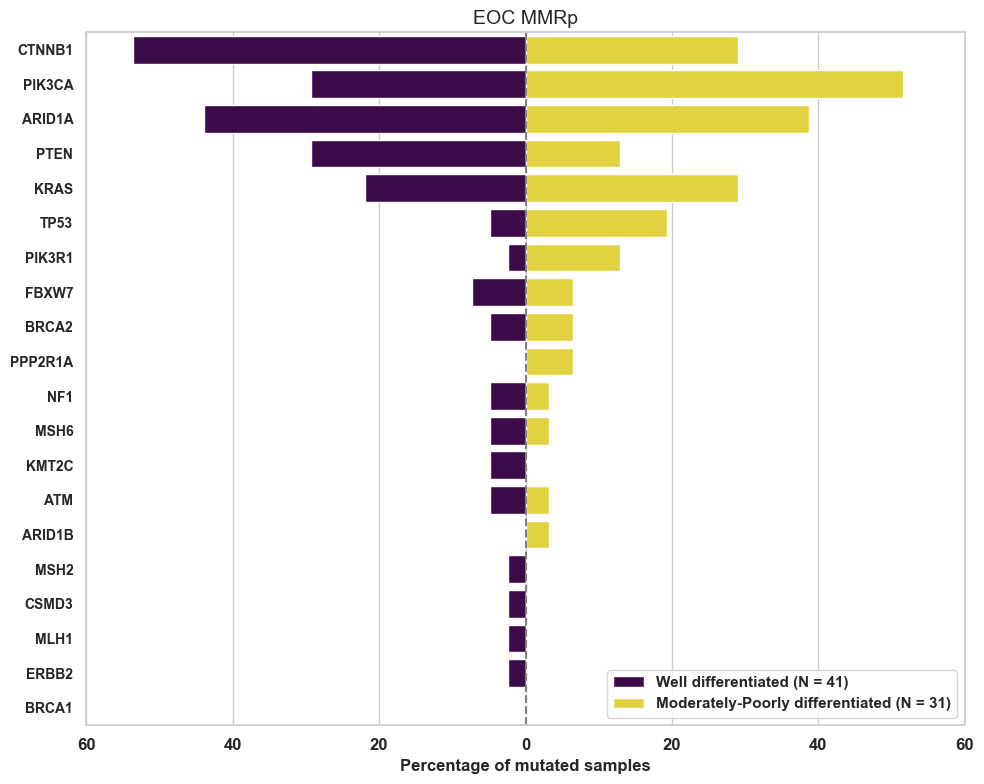

In [73]:
### BAR PLOTS FOR EOC MMRp TO COMPARE PERCENTAGES OF SAMPLES MUTATED IN TOP 20 GENES IN EVERY GRADE GROUPED CATEGORY ###############

# Uncomment to import if not done previously
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
#from matplotlib.ticker import FuncFormatter
#from scipy.stats import fisher_exact

# Set style for the plots
sns.set(style="whitegrid")

# Define a function to perform Fisher's Exact Test for each gene and return significant genes
def get_significant_genes_and_pvalues(data_well, data_mod_poor, N_well, N_mod_poor):
    significant_genes = []
    p_values = {}

    # Perform Fisher's Exact test for each gene
    for gene in data_well['Gene']:
        # Get the mutation counts for the gene in each group
        count_well = (data_well.loc[data_well['Gene'] == gene, 'Percentage'].values[0] * N_well) / 100
        count_mod_poor = (data_mod_poor.loc[data_mod_poor['Gene'] == gene, 'Percentage'].values[0] * N_mod_poor) / 100
        
        mutated_well = int(count_well)
        mutated_mod_poor = int(count_mod_poor)
        
        total_well = N_well - mutated_well
        total_mod_poor = N_mod_poor - mutated_mod_poor
        
        # Contingency table for Fisher's Exact Test
        table = [[mutated_well, total_well], [mutated_mod_poor, total_mod_poor]]
        
        # Perform the Fisher's Exact test
        _, p_value = fisher_exact(table)
        
        # Store p-value for the gene
        p_values[gene]=p_value
        
        # If p-value is less than 0.05, consider it as significant
        if p_value < 0.05:
            significant_genes.append(gene)
    
    return significant_genes, p_values

# Define a function to plot horizontal bar charts for GRADE subgroups with customized legend names
def plot_horizontal_bar(data_well, data_mod_poor, N_well, N_mod_poor, title, x_limit):
    # Add GRADE group labels to each DataFrame
    data_well['Group'] = f'Well differentiated (N = {N_well})'
    data_mod_poor['Group'] = f'Moderately-Poorly differentiated (N = {N_mod_poor})'
    
    # Combine all GRADE data into a single DataFrame
    combined_data = pd.concat([data_well, data_mod_poor])

    # Assign negative values for "Well differentiated" to plot it on the left side
    combined_data['Adjusted Percentage'] = combined_data.apply(
        lambda x: -x['Percentage'] if x['Group'].startswith('Well differentiated') else x['Percentage'], axis=1
    )

    # Order genes to align correctly the bars in the Y axis
    combined_data['Gene'] = pd.Categorical(
        combined_data['Gene'], 
        categories=combined_data.sort_values(by='Percentage', ascending=False)['Gene'].unique()
    )

    # Get the list of significant genes and their p-values
    significant_genes, p_values = get_significant_genes_and_pvalues(data_well, data_mod_poor, N_well, N_mod_poor)

    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed

    # Plot the horizontal bar chart
    sns.barplot(
        x='Adjusted Percentage', y='Gene', data=combined_data, ax=ax, hue='Group', dodge=False, palette=['#440154', '#fde725']
    )
    
    # Set the title
    ax.set_title(f"{title}", fontsize=14)

    # Customize labels
    ax.set_xlabel('Percentage of mutated samples', fontsize=12, fontweight='bold')
    ax.set_ylabel('')  # Remove y-axis label for clarity
    ax.axvline(x=0, color='gray', linestyle='--')  # Vertical line at x=0 for separation

    # Customize y-axis labels: bold and specific styling for significant genes
    y_labels = []
    for label in ax.get_yticklabels():
        gene_name = label.get_text()
        if gene_name in significant_genes:
            label.set_text(f"{gene_name}*")  # Add asterisk for significant genes
            label.set_color('red')  # Make significant genes red
            label.set_fontweight('bold')  # Make significant genes bold
        else:
            label.set_fontweight('bold')  # Other genes also bold
        y_labels.append(label)
    
    # Set the y-tick labels after processing
    ax.set_yticklabels(y_labels, fontsize=10)

    # Limit x-axis range to be symmetrical
    ax.set_xlim(-x_limit, x_limit)

    # Customize x-axis labels: bold
    ax.tick_params(axis='x', labelsize=12, labelrotation=0, which='both')  # Control general
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')  # Marcar en negrita
    # Use FuncFormatter to make all values on the X-axis positive
    def positive_formatter(x, pos):
        return f'{abs(x):.0f}'  # Convert negative values to positive

    ax.xaxis.set_major_formatter(FuncFormatter(positive_formatter))
    # Add a legend and position it inside the plot at the bottom-right, with two rows
    legend = ax.legend(
        loc='lower right',  # Location inside the plot
        bbox_to_anchor=(1, 0),  # Position it inside the graph, top-right
        frameon=True, 
        ncol=1,  # Two columns (one for each category)
        fontsize=12,
        title_fontsize='13',  # Make title slightly larger
        prop={'weight': 'bold'}  # Set the legend text to bold
    )

    # Adjust layout for a clean look
    plt.tight_layout()

    # **DEBUG: Print the p-values to ensure they are being calculated**
    print(f"\nP-values for {title}:")
    for gene, p_value in p_values.items():
        print(f"Gene: {gene}, p-value: {p_value:.4f}")

    # Save and display the plot
    plt.savefig(f"/home/vant/TFM/Plots_TFM_final/Drivers_{title}_GRADE_mediumhigh_grouped.png", format='png', dpi=300)
    plt.show()

# Example usage:
# Plot EOC MMRp well differentiated with x-axis limit -60 to 60
plot_horizontal_bar(
    eoc_well_mmrp_df, eoc_mod_poor_mmrp_df, 
    total_eoc_well_mmrp, total_eoc_mod_poor_mmrp, 
    'EOC MMRp', x_limit=60
)

In [74]:
### CALCULATE PERCENTAGEs OF SAMPLES MUTATED IN TOP 20 GENES IN EVERY RESIDUALa CATEGORY IN EOC AND CCOC  ########

df_var6 = df_variables.dropna(subset=['RESIDUALa']).copy()  # Remove rows with NaN in 'RESIDUALa'
map_res = {0: 'No', 1: 'Yes'}  # Mapping dictionary
df_var6['RESIDUALa'] = df_var6['RESIDUALa'].map(map_res)  # Apply mapping

# Define subgroups for EOC and CC with MMRp and MMRd
### EOC without residual disease
eoc_nores = df_var6[
    (df_var6['HISTOLOGY'] == 0) & 
    (df_var6['RESIDUALa']=='No')
]
total_eoc_nores = len(eoc_nores['ID_CNIO'].unique())
print("Total number of EOC samples with no residual disease:", total_eoc_nores)

### EOC with residual disease
eoc_res = df_var6[ 
    (df_var6['HISTOLOGY'] == 0) & 
    (df_var6['RESIDUALa']=='Yes')
]
total_eoc_res = len(eoc_res['ID_CNIO'].unique())
print("Total number of EOC samples with residual disease:", total_eoc_res)

### CC without residual disease
cc_nores = df_var6[
    (df_var6['HISTOLOGY'] == 1) & 
    (df_var6['RESIDUALa']=='No')
]
total_cc_nores = len(cc_nores['ID_CNIO'].unique())
print("Total number of CC samples with no residual disease:", total_cc_nores)

### CC with residual disease
cc_res = df_var6[ 
    (df_var6['HISTOLOGY'] == 1) & 
    (df_var6['RESIDUALa']=='Yes')
]
total_cc_res = len(cc_res['ID_CNIO'].unique())
print("Total number of CC samples with residual disease:", total_cc_res)

### Prepare mutations data for every subgroup based on RESIDUALa groups
eoc_nores_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_nores['ID_CNIO']))
]
eoc_res_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_res['ID_CNIO']))
]
cc_nores_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['Sample'].isin(cc_nores['ID_CNIO']))
]
cc_res_mut = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['Sample'].isin(cc_res['ID_CNIO']))
]

# Function to calculate the percentage per gene
def calculate_gene_percentage(data, total_samples):
    gene_counts = data['Gene'].value_counts()
    return (gene_counts / total_samples) * 100

# Calculate the mutation percentage in every subgroup based on FIGO groups
eoc_nores_percentages = calculate_gene_percentage(eoc_nores_mut, total_eoc_nores)
eoc_res_percentages = calculate_gene_percentage(eoc_res_mut, total_eoc_res)

cc_nores_percentages = calculate_gene_percentage(cc_nores_mut, total_cc_nores)
cc_res_percentages = calculate_gene_percentage(cc_res_mut, total_cc_res)

print("EOC percentages no residual disease:",eoc_nores_percentages)
print("EOC percentages residual disease:",eoc_res_percentages)
print("CC percentages no residual disease:",cc_nores_percentages)
print("CC percentages residual disease:",cc_res_percentages)


# Create dataframes with genes and percentages for each subgroup
eoc_nores_df = pd.DataFrame({'Gene': eoc_nores_percentages.index, 'Percentage': eoc_nores_percentages.values})
eoc_res_df = pd.DataFrame({'Gene': eoc_res_percentages.index, 'Percentage': eoc_res_percentages.values})

cc_nores_df = pd.DataFrame({'Gene': cc_nores_percentages.index, 'Percentage': cc_nores_percentages.values})
cc_res_df = pd.DataFrame({'Gene': cc_res_percentages.index, 'Percentage': cc_res_percentages.values})

# Reorder the DataFrames according to the most mutated genes in all cohort (EOC+CC)
eoc_nores_df = eoc_nores_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_res_df = eoc_res_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

cc_nores_df = cc_nores_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_res_df = cc_res_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

# Print final DataFrames for verification
print("EOC no residual disease:\n", eoc_nores_df)
print("EOC residual disease:\n", eoc_res_df)

print("CC no residual disease:\n", cc_nores_df)
print("CC residual disease:\n", cc_res_df)

Total number of EOC samples with no residual disease: 69
Total number of EOC samples with residual disease: 5
Total number of CC samples with no residual disease: 42
Total number of CC samples with residual disease: 16
EOC percentages no residual disease: Gene
ARID1A     46.376812
PIK3CA     40.579710
CTNNB1     37.681159
PTEN       30.434783
KRAS       28.985507
TP53       13.043478
FBXW7       7.246377
PIK3R1      7.246377
ATM         5.797101
BRCA2       5.797101
APC         4.347826
FGFR2       4.347826
MSH6        4.347826
MLH1        4.347826
PPP2R1A     4.347826
NF1         4.347826
TEAD2       4.347826
WDTC1       4.347826
PMS2        2.898551
MSH3        2.898551
PALB2       2.898551
DOCK3       2.898551
TSC1        2.898551
ACVR2A      2.898551
ARID1B      2.898551
RNF43       2.898551
SPOP        2.898551
NRAS        2.898551
SMARCA4     1.449275
KDM5C       1.449275
RAD50       1.449275
MTOR        1.449275
ERBB2       1.449275
RPL22       1.449275
SLC3A2      1.449275
EGFR

In [75]:
###### TESTS TO CHECK IF THERE ARE DIFFERENTIALLY MUTATED GENES IN EOC BETWEEN RESIDUALa CATEGORIES ############
## ONLY 5 SAMPLES WITH RESIDUAL DISEASE SO WE MUST USE FISHER TEST #####
from scipy.stats import fisher_exact

# Total number of samples in each group 
print(total_eoc_nores)
print(total_eoc_res)

# Dictionary with gene mutation percentages for each group
gene_data = {
    'ARID1A': (46.37, 40),
    'PIK3CA': (40.58, 40),
    'CTNNB1': (37.68, 0),
    'KRAS': (28.99, 40),
    'PTEN': (30.43, 20),
    'TP53': (13.04, 40),
    'FBXW7': (7.25, 20),
    'MSH6': (4.35, 20),
    'BRCA2': (5.8, 20)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (eoc_nores_percentages, eoc_res_percentages) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_nores = int(round( eoc_nores_percentages / 100 * total_eoc_nores))
    not_mutated_nores = total_eoc_nores- mutated_nores
    mutated_res = int(round( eoc_res_percentages / 100 * total_eoc_res))
    not_mutated_res = total_eoc_res - mutated_res

    # Create the contingency table
    table = [[mutated_nores, not_mutated_nores], [mutated_res, not_mutated_res]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the groups.")
    else:
        print("There is no significant difference in mutation proportions between the groups.")
    print("----------")

69
5
Gene: ARID1A
Odds ratio: 1.2972972972972974
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3CA
Odds ratio: 1.024390243902439
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: CTNNB1
Odds ratio: inf
p-value: 0.1549270943444202
There is no significant difference in mutation proportions between the groups.
----------
Gene: KRAS
Odds ratio: 0.6122448979591837
p-value: 0.6302664810285878
There is no significant difference in mutation proportions between the groups.
----------
Gene: PTEN
Odds ratio: 1.75
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: TP53
Odds ratio: 0.225
p-value: 0.1569085002424767
There is no significant difference in mutation proportions between the groups.
----------
Gene: FBXW7
Odds ratio: 0.3125
p-value: 0.35289088597983065
There is no significant difference in mutation proportion

In [76]:
###### TESTS TO CHECK IF THERE ARE DIFFERENTIALLY MUTATED GENES IN CCOC BETWEEN RESIDUALa CATEGORIES ############

from scipy.stats import fisher_exact

# Total number of samples in each group 
print(total_cc_nores)
print(total_cc_res)

# Dictionary with gene mutation percentages for each group
gene_data = {
    'ARID1A': (57.14, 37.5),
    'PIK3CA': (57.14, 43.75),
    'CTNNB1': (9.52, 6.25),
    'KRAS': (11.9, 12.5),
    'PTEN': (9.52, 0),
    'TP53': (14.29, 18.75),
    'PPP2R1A': (2.38, 18.75),
    'ATM': (2.38, 12.5),
    'BRCA1': (2.38, 12.5)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (cc_nores_percentages, cc_res_percentages) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_nores = int(round( cc_nores_percentages / 100 * total_cc_nores))
    not_mutated_nores = total_cc_nores- mutated_nores
    mutated_res = int(round( cc_res_percentages / 100 * total_cc_res))
    not_mutated_res = total_cc_res - mutated_res

    # Create the contingency table
    table = [[mutated_nores, not_mutated_nores], [mutated_res, not_mutated_res]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the groups.")
    else:
        print("There is no significant difference in mutation proportions between the groups.")
    print("----------")

42
16
Gene: ARID1A
Odds ratio: 2.2222222222222223
p-value: 0.24322372468104048
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3CA
Odds ratio: 1.7142857142857142
p-value: 0.39288536847293914
There is no significant difference in mutation proportions between the groups.
----------
Gene: CTNNB1
Odds ratio: 1.5789473684210527
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: KRAS
Odds ratio: 0.9459459459459459
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: PTEN
Odds ratio: inf
p-value: 0.5670681405708631
There is no significant difference in mutation proportions between the groups.
----------
Gene: TP53
Odds ratio: 0.7222222222222222
p-value: 0.6959866953820033
There is no significant difference in mutation proportions between the groups.
----------
Gene: PPP2R1A
Odds ratio: 0.10569105691056911
p-value: 0.05972611780234

In [77]:
### CALCULATE PERCENTAGES OF SAMPLES MUTATED IN THE TOP 20 GENES IN EVERY RESIDUALa CATEGORY IN EVERY HISTOLOGY IN MMRp SAMPLES ########

# Define subgroups for EOC and CC with MMRp
### EOC without residual disease
eoc_nores_mmrp = df_var6[
    (df_var6['MMR_final_status'] == 'MMRp') & 
    (df_var6['HISTOLOGY'] == 0) & 
    (df_var6['RESIDUALa']=='No')
]
total_eoc_nores_mmrp = len(eoc_nores_mmrp['ID_CNIO'].unique())
print("Total number of EOC MMRp samples with no residual disease:", total_eoc_nores_mmrp)

### EOC with residual disease
eoc_res_mmrp = df_var6[
    (df_var6['MMR_final_status'] == 'MMRp') & 
    (df_var6['HISTOLOGY'] == 0) & 
    (df_var6['RESIDUALa']=='Yes')
]
total_eoc_res_mmrp = len(eoc_res_mmrp['ID_CNIO'].unique())
print("Total number of EOC MMRp samples with residual disease:", total_eoc_res_mmrp)

### CC without residual disease
cc_nores_mmrp = df_var6[
    (df_var6['MMR_final_status'] == 'MMRp') & 
    (df_var6['HISTOLOGY'] == 1) & 
    (df_var6['RESIDUALa']=='No')
]
total_cc_nores_mmrp = len(cc_nores_mmrp['ID_CNIO'].unique())
print("Total number of CC MMRp samples with no residual disease:", total_cc_nores_mmrp)

### CC with residual disease
cc_res_mmrp = df_var6[ 
    (df_var6['MMR_final_status'] == 'MMRp') & 
    (df_var6['HISTOLOGY'] == 1) & 
    (df_var6['RESIDUALa']=='Yes')
]
total_cc_res_mmrp = len(cc_res_mmrp['ID_CNIO'].unique())
print("Total number of CC MMRp samples with residual disease:", total_cc_res_mmrp)

### Prepare mutations data for every subgroup based on RESIDUALa groups
eoc_nores_mut_mmrp = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_nores_mmrp['ID_CNIO']))
]
eoc_res_mut_mmrp = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 0) & 
    (mutations_subset_unique['Sample'].isin(eoc_res_mmrp['ID_CNIO']))
]
cc_nores_mut_mmrp = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['Sample'].isin(cc_nores_mmrp['ID_CNIO']))
]
cc_res_mut_mmrp = mutations_subset_unique[
    (mutations_subset_unique['HISTOLOGY'] == 1) & 
    (mutations_subset_unique['Sample'].isin(cc_res_mmrp['ID_CNIO']))
]

# Function to calculate the percentage per gene
def calculate_gene_percentage(data, total_samples):
    gene_counts = data['Gene'].value_counts()
    return (gene_counts / total_samples) * 100

# Calculate the mutation percentage in every subgroup based on FIGO groups
eoc_nores_percentages_mmrp = calculate_gene_percentage(eoc_nores_mut, total_eoc_nores)
eoc_res_percentages_mmrp = calculate_gene_percentage(eoc_res_mut, total_eoc_res)

cc_nores_percentages_mmrp = calculate_gene_percentage(cc_nores_mut_mmrp, total_cc_nores_mmrp)
cc_res_percentages_mmrp= calculate_gene_percentage(cc_res_mut_mmrp, total_cc_res_mmrp)

print("EOC MMRp percentages no residual disease:",eoc_nores_percentages_mmrp)
print("EOC MMRp percentages residual disease:",eoc_res_percentages_mmrp)
print("CC MMRp percentages no residual disease:",cc_nores_percentages_mmrp)
print("CC MMRp percentages residual disease:",cc_res_percentages_mmrp)

# Create dataframes with genes and percentages for each subgroup
eoc_nores_df_mmrp = pd.DataFrame({'Gene': eoc_nores_percentages_mmrp.index, 'Percentage': eoc_nores_percentages_mmrp.values})
eoc_res_df_mmrp = pd.DataFrame({'Gene': eoc_res_percentages_mmrp.index, 'Percentage': eoc_res_percentages_mmrp.values})

cc_nores_df_mmrp = pd.DataFrame({'Gene': cc_nores_percentages_mmrp.index, 'Percentage': cc_nores_percentages_mmrp.values})
cc_res_df_mmrp = pd.DataFrame({'Gene': cc_res_percentages_mmrp.index, 'Percentage': cc_res_percentages_mmrp.values})

# Reorder the DataFrames according to the most mutated genes in all cohort (EOC+CC)
eoc_nores_df_mmrp = eoc_nores_df_mmrp.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_res_df_mmrp = eoc_res_df_mmrp.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

cc_nores_df_mmrp = cc_nores_df_mmrp.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_res_df_mmrp = cc_res_df_mmrp.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()

# Print final DataFrames for verification
print("EOC MMRp no residual disease:\n", eoc_nores_df_mmrp)
print("EOC MMRp residual disease:\n", eoc_res_df_mmrp)

print("CC MMRp no residual disease:\n", cc_nores_df_mmrp)
print("CC MMRp residual disease:\n", cc_res_df_mmrp)


Total number of EOC MMRp samples with no residual disease: 61
Total number of EOC MMRp samples with residual disease: 5
Total number of CC MMRp samples with no residual disease: 41
Total number of CC MMRp samples with residual disease: 14
EOC MMRp percentages no residual disease: Gene
ARID1A     46.376812
PIK3CA     40.579710
CTNNB1     37.681159
PTEN       30.434783
KRAS       28.985507
TP53       13.043478
FBXW7       7.246377
PIK3R1      7.246377
ATM         5.797101
BRCA2       5.797101
APC         4.347826
FGFR2       4.347826
MSH6        4.347826
MLH1        4.347826
PPP2R1A     4.347826
NF1         4.347826
TEAD2       4.347826
WDTC1       4.347826
PMS2        2.898551
MSH3        2.898551
PALB2       2.898551
DOCK3       2.898551
TSC1        2.898551
ACVR2A      2.898551
ARID1B      2.898551
RNF43       2.898551
SPOP        2.898551
NRAS        2.898551
SMARCA4     1.449275
KDM5C       1.449275
RAD50       1.449275
MTOR        1.449275
ERBB2       1.449275
RPL22       1.449275


In [78]:
###### TESTS TO CHECK IF THERE ARE DIFFERENTIALLY MUTATED GENES IN EOC MMRp GROUP BETWEEN RESIDUALa CATEGORIES ############

from scipy.stats import fisher_exact

# Total number of samples in each group 
print(total_eoc_nores_mmrp)
print(total_eoc_res_mmrp)

# Dictionary with gene mutation percentages for each group
gene_data = {
    'ARID1A': (46.37, 40),
    'PIK3CA': (40.58, 40),
    'CTNNB1': (37.68, 0),
    'KRAS': (28.99, 40),
    'PTEN': (30.43, 20),
    'TP53': (13.04, 40),
    'FBXW7': (7.25, 20),
    'MSH6': (4.35, 20),
    'BRCA2': (5.8, 20)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (eoc_nores_percentages_mmrp, eoc_res_percentages_mmrp) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_nores_mmrp = int(round( eoc_nores_percentages_mmrp / 100 * total_eoc_nores_mmrp))
    not_mutated_nores = total_eoc_nores_mmrp- mutated_nores_mmrp
    mutated_res_mmrp = int(round( eoc_res_percentages_mmrp / 100 * total_eoc_res_mmrp))
    not_mutated_res = total_eoc_res_mmrp - mutated_res_mmrp

    # Create the contingency table
    table = [[mutated_nores_mmrp, not_mutated_nores], [mutated_res_mmrp, not_mutated_res]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the groups.")
    else:
        print("There is no significant difference in mutation proportions between the groups.")
    print("----------")

61
5
Gene: ARID1A
Odds ratio: 1.2727272727272727
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3CA
Odds ratio: 1.0416666666666667
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: CTNNB1
Odds ratio: inf
p-value: 0.15408113391984363
There is no significant difference in mutation proportions between the groups.
----------
Gene: KRAS
Odds ratio: 0.627906976744186
p-value: 0.6348073969041711
There is no significant difference in mutation proportions between the groups.
----------
Gene: PTEN
Odds ratio: 1.8095238095238095
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: TP53
Odds ratio: 0.22641509433962265
p-value: 0.16160049627791565
There is no significant difference in mutation proportions between the groups.
----------
Gene: FBXW7
Odds ratio: 0.2807017543859649
p-value: 0.3343185712137325
There is no sign

In [79]:
###### TESTS TO CHECK IF THERE ARE DIFFERENTIALLY MUTATED GENES IN CCOC MMRp GROUP BETWEEN RESIDUALa CATEGORIES ############

from scipy.stats import fisher_exact

# Total number of samples in each group 
print(total_cc_nores_mmrp)
print(total_cc_res_mmrp)

# Dictionary with gene mutation percentages for each group
gene_data = {
    'ARID1A': (56.1, 35.71),
    'PIK3CA': (56.1, 42.86),
    'CTNNB1': (9.76, 7.14),
    'KRAS': (12.2, 14.29),
    'PTEN': (7.31, 0),
    'TP53': (14.63, 21.43),
    'PPP2R1A': (2.44, 14.29),
    'ATM': (0,7.14),
    'BRCA1': (0, 14.29)
}
# Significance level
alpha = 0.05

# Loop over each gene and perform Fisher's Exact Test
for gene, (cc_nores_percentages_mmrp, cc_res_percentages_mmrp) in gene_data.items():
    # Convert percentages to counts of mutated and non-mutated samples
    mutated_nores_mmrp = int(round( cc_nores_percentages_mmrp / 100 * total_cc_nores_mmrp))
    not_mutated_nores = total_cc_nores_mmrp- mutated_nores_mmrp
    mutated_res_mmrp = int(round( cc_res_percentages_mmrp / 100 * total_cc_res_mmrp))
    not_mutated_res = total_cc_res_mmrp - mutated_res_mmrp

    # Create the contingency table
    table = [[mutated_nores_mmrp, not_mutated_nores], [mutated_res_mmrp, not_mutated_res]]
    
    # Perform Fisher's Exact Test
    oddsratio, p_value = fisher_exact(table)

    # Display the results for each gene
    print(f"Gene: {gene}")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_value)
    
    # Interpretation of the result
    if p_value < alpha:
        print("There is a significant difference in mutation proportions between the groups.")
    else:
        print("There is no significant difference in mutation proportions between the groups.")
    print("----------")

41
14
Gene: ARID1A
Odds ratio: 2.3
p-value: 0.22695752000537878
There is no significant difference in mutation proportions between the groups.
----------
Gene: PIK3CA
Odds ratio: 1.7037037037037037
p-value: 0.5371910044161063
There is no significant difference in mutation proportions between the groups.
----------
Gene: CTNNB1
Odds ratio: 1.4054054054054055
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: KRAS
Odds ratio: 0.8333333333333334
p-value: 1.0
There is no significant difference in mutation proportions between the groups.
----------
Gene: PTEN
Odds ratio: inf
p-value: 0.5624166190203925
There is no significant difference in mutation proportions between the groups.
----------
Gene: TP53
Odds ratio: 0.6285714285714286
p-value: 0.6782436021012543
There is no significant difference in mutation proportions between the groups.
----------
Gene: PPP2R1A
Odds ratio: 0.15
p-value: 0.1560891938250429
There is no significant diff


P-values for EOC MMRp Residuala:
Gene: ARID1A, p-value: 1.0000
Gene: PIK3CA, p-value: 1.0000
Gene: CTNNB1, p-value: 0.1605
Gene: KRAS, p-value: 0.6208
Gene: PTEN, p-value: 1.0000
Gene: TP53, p-value: 0.1337
Gene: PPP2R1A, p-value: 1.0000
Gene: FBXW7, p-value: 0.3343
Gene: PIK3R1, p-value: 1.0000
Gene: ATM, p-value: 1.0000
Gene: KMT2C, p-value: 0.0758
Gene: MSH6, p-value: 0.2135
Gene: ARID1B, p-value: 1.0000
Gene: ERBB2, p-value: 1.0000
Gene: NF1, p-value: 0.2135
Gene: BRCA2, p-value: 0.2759
Gene: MLH1, p-value: 1.0000
Gene: CSMD3, p-value: 0.0758
Gene: MSH2, p-value: 0.0758
Gene: BRCA1, p-value: 1.0000


/tmp/ipykernel_6402/3774084017.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels, fontsize=10)
/tmp/ipykernel_6402/3774084017.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels, fontsize=10)



P-values for CCOC MMRp Residuala:
Gene: ARID1A, p-value: 0.2270
Gene: PIK3CA, p-value: 0.5372
Gene: CTNNB1, p-value: 1.0000
Gene: KRAS, p-value: 1.0000
Gene: PTEN, p-value: 0.5624
Gene: TP53, p-value: 0.6782
Gene: PPP2R1A, p-value: 0.1561
Gene: FBXW7, p-value: 1.0000
Gene: PIK3R1, p-value: 0.4478
Gene: ATM, p-value: 0.2545
Gene: KMT2C, p-value: 0.5624
Gene: MSH6, p-value: 1.0000
Gene: ARID1B, p-value: 0.4478
Gene: ERBB2, p-value: 1.0000
Gene: NF1, p-value: 1.0000
Gene: BRCA2, p-value: 1.0000
Gene: MLH1, p-value: 1.0000
Gene: CSMD3, p-value: 1.0000
Gene: MSH2, p-value: 1.0000
Gene: BRCA1, p-value: 0.0613


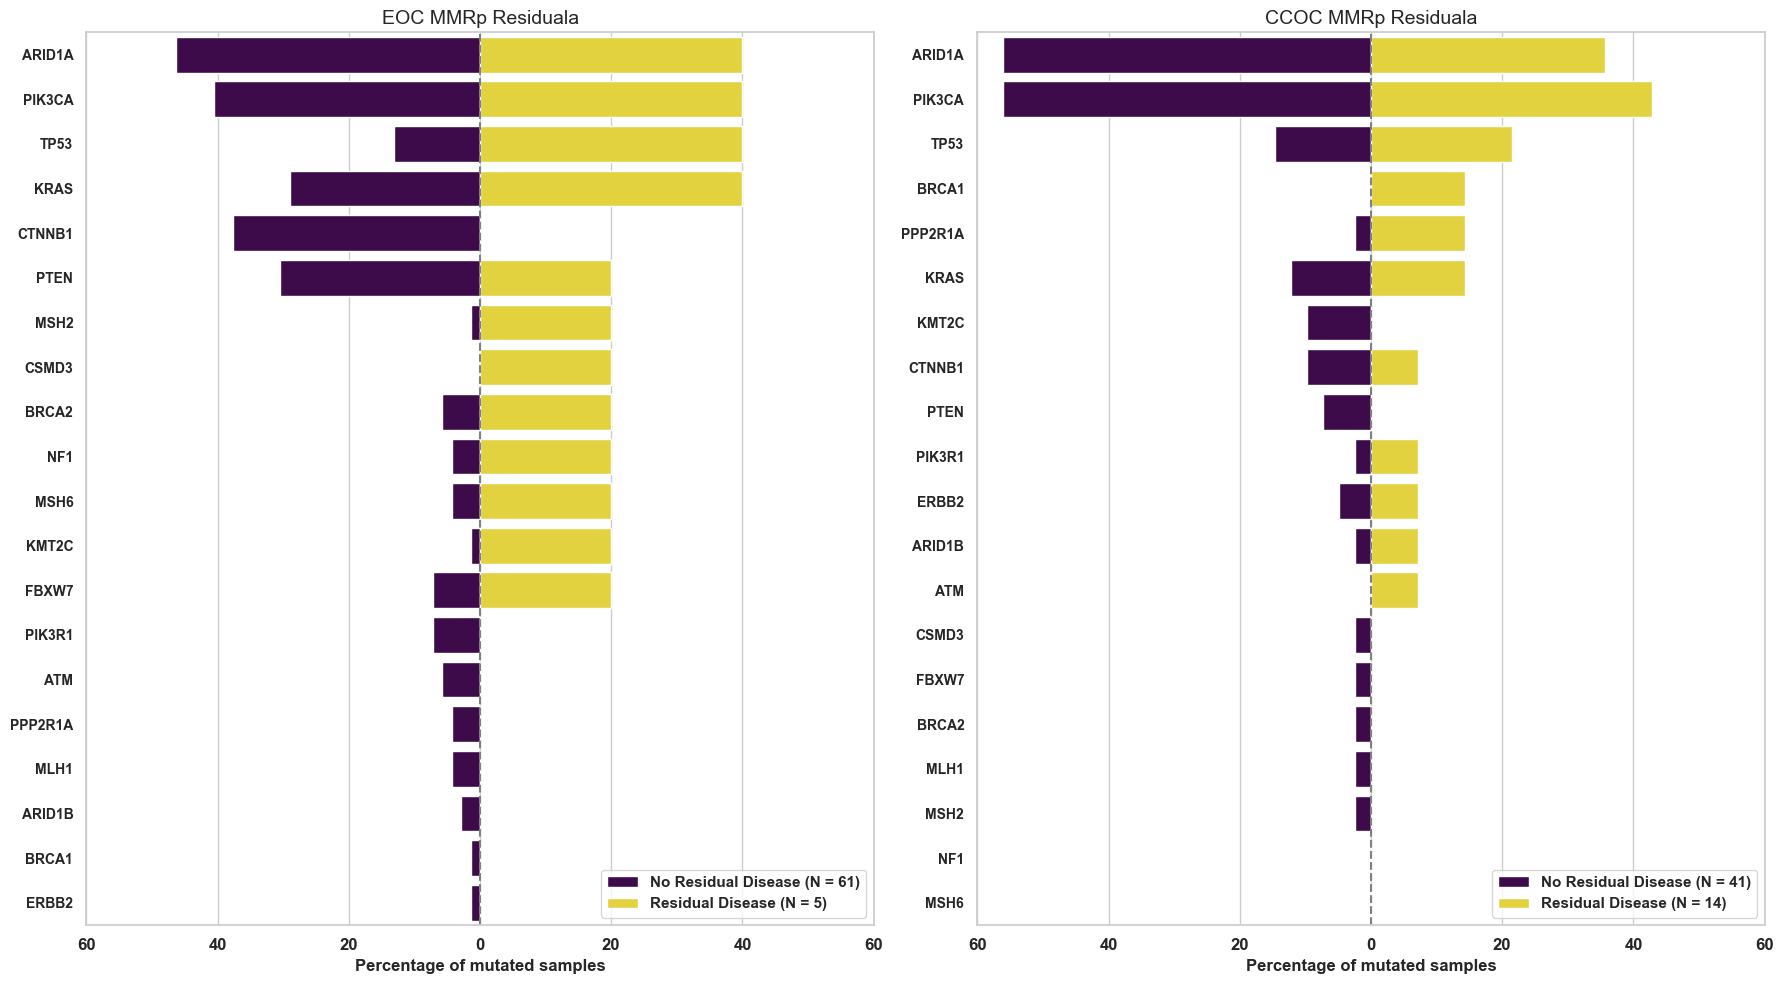

In [80]:
# BAR PLOTS FOR RESIDUALa COMPARISON IN EOC AND CCOC ###############

# Set style for the plots
sns.set(style="whitegrid")

# Define a function to perform Fisher's Exact Test for each gene and return significant genes
def get_significant_genes_and_pvalues(data_no, data_yes, N_no, N_yes):
    significant_genes = []
    p_values = {}

    # Perform Fisher's Exact test for each gene
    for gene in data_no['Gene']:
        # Get the mutation counts for the gene in each group
        count_no = (data_no.loc[data_no['Gene'] == gene, 'Percentage'].values[0] * N_no) / 100
        count_yes = (data_yes.loc[data_yes['Gene'] == gene, 'Percentage'].values[0] * N_yes) / 100
        
        mutated_no = int(count_no)
        mutated_yes = int(count_yes)
        
        total_no = N_no - mutated_no
        total_yes = N_yes - mutated_yes
        
        # Contingency table for Fisher's Exact Test
        table = [[mutated_no, total_no], [mutated_yes, total_yes]]
        
        # Perform the Fisher's Exact test
        _, p_value = fisher_exact(table)
        
        # Store p-value for the gene
        p_values[gene] = p_value
        
        # If p-value is less than 0.05, consider it as significant
        if p_value < 0.05:
            significant_genes.append(gene)
    
    return significant_genes, p_values

# Define a function to plot horizontal bar charts for Residuala subgroups
def plot_horizontal_bar(data_no, data_yes, N_no, N_yes, title, ax, x_limit):
    # Add Residuala group labels to each DataFrame
    data_no['Group'] = f'No Residual Disease (N = {N_no})'
    data_yes['Group'] = f'Residual Disease (N = {N_yes})'
    
    # Combine Residuala data into a single DataFrame
    combined_data = pd.concat([data_no, data_yes])

    # Assign negative values for "No Residual Disease" to plot it on the left side
    combined_data['Adjusted Percentage'] = combined_data.apply(
        lambda x: -x['Percentage'] if x['Group'].startswith('No Residual Disease') else x['Percentage'], axis=1
    )

    # Order genes to align correctly the bars in the Y axis
    combined_data['Gene'] = pd.Categorical(
        combined_data['Gene'], 
        categories=combined_data.sort_values(by='Percentage', ascending=False)['Gene'].unique()
    )

    # Get the list of significant genes and their p-values
    significant_genes, p_values = get_significant_genes_and_pvalues(data_no, data_yes, N_no, N_yes)

    # Plot the horizontal bar chart
    sns.barplot(
        x='Adjusted Percentage', y='Gene', data=combined_data, ax=ax, hue='Group', dodge=False, palette=['#440154', '#fde725']
    )
    
    # Set the title
    ax.set_title(f"{title}", fontsize=14)

    # Customize labels
    ax.set_xlabel('Percentage of mutated samples', fontsize=12, fontweight='bold')
    ax.set_ylabel('')  # Remove y-axis label for clarity
    ax.axvline(x=0, color='gray', linestyle='--')  # Vertical line at x=0 for separation

    # Customize y-axis labels: bold and specific styling for significant genes
    y_labels = []
    for label in ax.get_yticklabels():
        gene_name = label.get_text()
        if gene_name in significant_genes:
            label.set_text(f"{gene_name}*")  # Add asterisk for significant genes
            label.set_color('red')  # Make significant genes red
            label.set_fontweight('bold')  # Make significant genes bold
        else:
            label.set_fontweight('bold')  # Other genes also bold
        y_labels.append(label)
    
    # Set the y-tick labels after processing
    ax.set_yticklabels(y_labels, fontsize=10)

    # Limit x-axis range to be symmetrical
    ax.set_xlim(-x_limit, x_limit)

    # Customize x-axis labels: bold
    ax.tick_params(axis='x', labelsize=12, labelrotation=0, which='both')  # Control general
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')  # Make labels bold

    # Use FuncFormatter to make all values on the X-axis positive
    def positive_formatter(x, pos):
        return f'{abs(x):.0f}'  # Convert negative values to positive

    ax.xaxis.set_major_formatter(FuncFormatter(positive_formatter))

    # Add a legend
    legend = ax.legend(
        loc='lower right', frameon=True, fontsize=12, title_fontsize='13', prop={'weight': 'bold'}
    )

    # Print the p-values to ensure they are being calculated
    print(f"\nP-values for {title}:")
    for gene, p_value in p_values.items():
        print(f"Gene: {gene}, p-value: {p_value:.4f}")

# Create a figure with subplots for EOC and CCOC
fig, axs = plt.subplots(1, 2, figsize=(18, 10))  # Adjust figure size as needed

# Plot for EOC
plot_horizontal_bar(
    eoc_nores_df_mmrp, eoc_res_df_mmrp, 
    total_eoc_nores_mmrp, total_eoc_res_mmrp, 
    'EOC MMRp Residuala', ax=axs[0], x_limit=60
)

# Plot for CCOC
plot_horizontal_bar(
    cc_nores_df_mmrp, cc_res_df_mmrp, 
    total_cc_nores_mmrp, total_cc_res_mmrp, 
    'CCOC MMRp Residuala', ax=axs[1], x_limit=60
)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and display the plot
plt.savefig("/home/vant/TFM/Plots_TFM_final/Drivers_Residuala_EOC_CCOC.png", format='png', dpi=300)
plt.show()
